# Process and Plot Summaries


# Imports and Members

In [1]:
# Imports
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import FormatStrFormatter
import os

In [2]:
# Prepare Member
thresholds = [0.1, 0.2, 0.33, 0.5, 0.67, 0.8, 0.9, 0.1, 0.2, 0.33, 0.5, 0.67, 0.8, 0.9]
threshold_sessions = ['01', '02', '033', '05', '067', '08', '09', 'o01', 'o02', 'o033', 'o05', 'o067', 'o08', 'o09']
threshold_legend = ['0.1', '0.2', '0.33', '0.5', '0.67', '0.8', '0.9']
buckets = [7, 11, 21, 41, 201]
bucket_sessions = ['A', 'B', 'C', 'D', 'E']
sb_mult_sessions = ['A', 'B']
bro_mult_sessions = ['A']
run_id_prefix_bro = 'bro'
run_id_prefix_sb = 'sb'
run_id_prefix_t = '_thresh_'
run_id_prefix_b = '_buck_'
run_id_prefix_m = '_mult_'
num_runs = 10

value_tag examples

- Info/cumulative_reward
- Info/episode_length
- Info/value_estimate
- Info/entropy
- Info/value_loss
- Info/policy_loss
- Info/learning_rate
- Info/Lesson

# Functions: Read event and CSV data
processSummary reads in the run_id and number of runs. It collects all the values specified by the value_tag and computes the mean of all runs if set to true. This function returns 3 pandas Dataframes: values, times, steps.

In [3]:
def processSummary(run_id, num_runs, value_tag, brain_name = '', create_mean = True):
    
    # Read data
    # generate list of directory path
    events = []
    for run in range(num_runs):
        events.append(EventAccumulator('summaries/' + run_id + '-' + str(run) + brain_name))
        events[run].Reload()
    
    # Prepare data
    _times = []
    _values = []
    _steps = []

    for run in events:
        times, steps, values = zip(*run.Scalars(value_tag))
        _times.append(times)
        _values.append(values)
        _steps.append(steps)
    
    _times = np.asarray(_times)
    _steps = np.asarray(_steps)
    _values = np.asarray(_values)
    
    _values = np.swapaxes(_values,0,1)
    _times = np.swapaxes(_times,0,1)
    
    # Reduce _steps to one column and reshape it
    _steps = _steps[0]
    _steps.shape = (_steps.size, 1)
    
    # Create data frames
    dfValues = pd.DataFrame(data=_values)
    dfTimes = pd.DataFrame(data=_times)
    dfSteps = pd.DataFrame(data=_steps)

    if create_mean:
        # Add mean column
        dfValues['mean'] = dfValues.mean(axis=1)
        # Add std column
        droppedMean = dfValues.drop(['mean'], axis=1)
        dfValues['std'] = droppedMean.std(axis=1)
        
    return dfValues, dfTimes, dfSteps

processCSV reads in all csv files found under the run_id. It collects all the values and computes the mean of all runs if set to true. This function returns 2 pandas Dataframes: values, steps.

In [4]:
def processCSV(run_id, delimiter=',', create_mean = True):
    # get csv files of the run_id
    filePaths = os.listdir('./csv/' + run_id)
    # Read csvs and merge to pandas data frame
    for i in range(len(filePaths)):
        if i == 0:
            dfValues = pd.read_csv('./csv/' + run_id + '/' + filePaths[i], delimiter = delimiter)
        else:
            a = pd.read_csv('./csv/' + run_id + '/' + filePaths[i], delimiter = delimiter)
            dfValues = pd.merge(dfValues, a, on='steps', how='outer')
    
    dfValues.columns = ['step', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
    dfSteps = dfValues['step']
    # Drop steps
    dfValues = dfValues.drop(['step'], axis = 1)
    
    if create_mean:
        # Add mean column
        dfValues['mean'] = dfValues.mean(axis=1)
        # Add std column
        droppedMean = dfValues.drop(['mean'], axis=1)
        dfValues['std'] = droppedMean.std(axis=1)
        
    return dfValues, dfSteps

# Threshold Data

## BRO

Cumulative Reward and Episode Length

In [5]:
bro_cum_array = []# Cumulative Reward
bro_el_array = [] # Episode Length
bro_time_array = []

for session in range(len(threshold_sessions)):
    run_id = run_id_prefix_bro + run_id_prefix_t + threshold_sessions[session] 
    cum_values, times, bro_steps = processSummary(run_id, num_runs, 'Info/cumulative_reward', '', True)
    el_values, times, bro_steps = processSummary(run_id, num_runs, 'Info/episode_length', '', True)
    bro_cum_array.append(cum_values)
    bro_el_array.append(el_values)
    bro_time_array.append(times)

INFO:tensorflow:No path found after summaries/bro_thresh_01-0/events.out.tfevents.1539889367.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_01-1/events.out.tfevents.1539889367.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_01-2/events.out.tfevents.1539889367.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_01-3/events.out.tfevents.1539889367.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_01-4/events.out.tfevents.1539889367.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_01-5/events.out.tfevents.1539889367.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_01-6/events.out.tfevents.1539889367.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_01-7/events.out.tfevents.1539889367.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_01-8/events.out.tfevents.1539889367.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/

INFO:tensorflow:No path found after summaries/bro_thresh_05-8/events.out.tfevents.1539957686.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_05-9/events.out.tfevents.1539957686.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_067-0/events.out.tfevents.1539982267.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_067-1/events.out.tfevents.1539982267.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_067-2/events.out.tfevents.1539982267.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_067-3/events.out.tfevents.1539982267.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_067-4/events.out.tfevents.1539982267.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_067-5/events.out.tfevents.1539982267.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_067-6/events.out.tfevents.1539982267.fcce7fa0f2c8
INFO:tensorflow:No path found after sum

INFO:tensorflow:No path found after summaries/bro_thresh_o01-5/events.out.tfevents.1540057237.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_o01-6/events.out.tfevents.1540057237.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_o01-7/events.out.tfevents.1540057237.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_o01-8/events.out.tfevents.1540057237.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_o01-9/events.out.tfevents.1540057237.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_o02-0/events.out.tfevents.1540081291.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_o02-1/events.out.tfevents.1540081291.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_o02-2/events.out.tfevents.1540081291.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_o02-3/events.out.tfevents.1540081291.fcce7fa0f2c8
INFO:tensorflow:No path found after s

INFO:tensorflow:No path found after summaries/bro_thresh_o067-2/events.out.tfevents.1540148787.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_o067-3/events.out.tfevents.1540148787.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_o067-4/events.out.tfevents.1540148787.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_o067-5/events.out.tfevents.1540148787.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_o067-6/events.out.tfevents.1540148787.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_o067-7/events.out.tfevents.1540148787.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_o067-8/events.out.tfevents.1540148787.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_o067-9/events.out.tfevents.1540148787.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_thresh_o08-0/events.out.tfevents.1540170723.fcce7fa0f2c8
INFO:tensorflow:No path found

### Shootings Birds
Cumulative Reward

In [6]:
sb_cum_array = [] # Cumulative Reward
sb_time_array = []

for session in range(len(threshold_sessions)):
    run_id = run_id_prefix_sb + run_id_prefix_t + threshold_sessions[session] 
    cum_values, times, sb_steps = processSummary(run_id, num_runs, 'Info/cumulative_reward', '', True)
    sb_cum_array.append(cum_values)
    sb_time_array.append(times)

INFO:tensorflow:No path found after summaries/sb_thresh_01-0/events.out.tfevents.1541144245.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_thresh_01-1/events.out.tfevents.1541144245.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_thresh_01-2/events.out.tfevents.1541144245.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_thresh_01-3/events.out.tfevents.1541144245.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_thresh_01-4/events.out.tfevents.1541144245.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_thresh_01-5/events.out.tfevents.1541144245.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_thresh_01-6/events.out.tfevents.1541144245.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_thresh_01-7/events.out.tfevents.1541144245.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_thresh_01-8/events.out.tfevents.1541144245.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_thresh

INFO:tensorflow:No path found after summaries/sb_thresh_o01-8/events.out.tfevents.1541173870.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_thresh_o01-9/events.out.tfevents.1541173870.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_thresh_o02-0/events.out.tfevents.1541178057.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_thresh_o02-1/events.out.tfevents.1541178057.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_thresh_o02-2/events.out.tfevents.1541178057.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_thresh_o02-3/events.out.tfevents.1541178057.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_thresh_o02-4/events.out.tfevents.1541178057.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_thresh_o02-5/events.out.tfevents.1541178057.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_thresh_o02-6/events.out.tfevents.1541178057.96d259f1e299
INFO:tensorflow:No path found after summaries/

Click Accuracy

In [7]:
sb_acc_array = []
for session in range(len(threshold_sessions)):
    run_id = run_id_prefix_sb + run_id_prefix_t + threshold_sessions[session] 
    accuracy, sb_steps = processCSV(run_id, ',', True)
    sb_acc_array.append(accuracy)

## Threshold Plots

In [8]:
colorTheme = np.array(['darkgray','lightsalmon','powderblue','lightcoral', 'plum', 'black', 'red'])

## BRO
#### Cumulative Episode Length & Episode Length
#### Inner Threshold vs Outter Thresold

In [9]:
# Shared formatting
def plotInnerOutter(y_min_lim, y_max_lim, title, y_label):
    plt.ylim(y_min_lim, y_max_lim)
    plt.xlabel('Environment Step')
    plt.ylabel(y_label)
    plt.title(title)

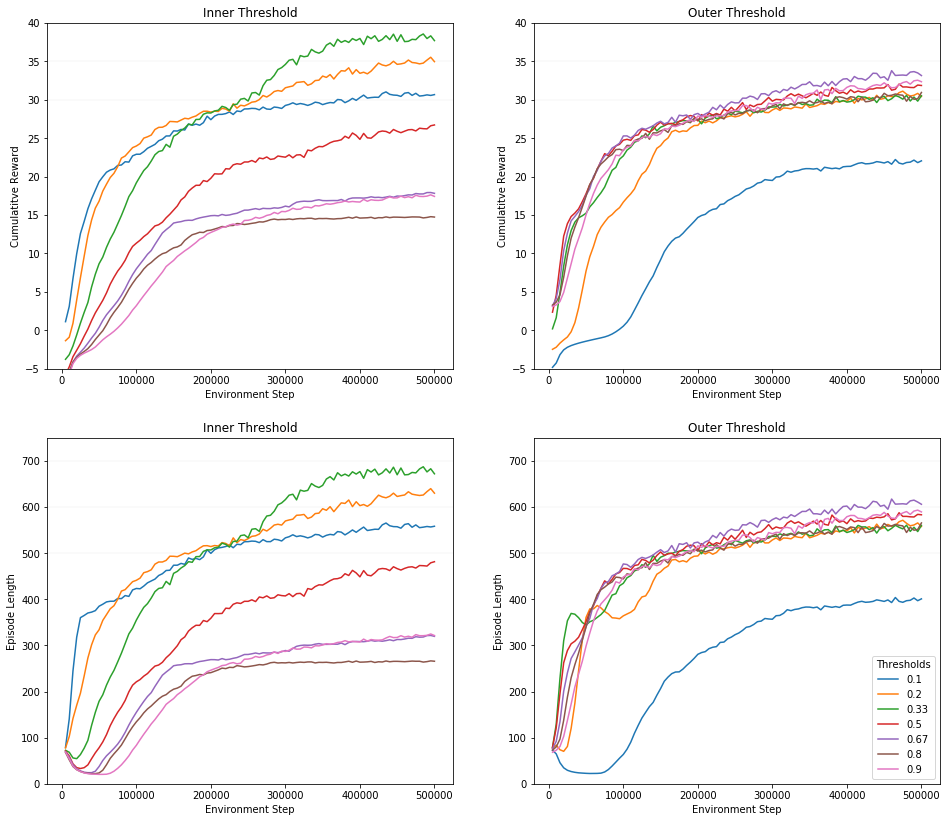

In [10]:
# Start Line Plot
fig = plt.figure()
plt.clf()

# Inner cumulative reward
plt.subplot(2, 2, 1)
plt.axhline(35, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(30, color='lightgrey', linewidth = 0.2, label='_nolegend_')
for session in range(7):
    plt.plot(bro_steps, bro_cum_array[session]['mean'])
plotInnerOutter(-5, 40, 'Inner Threshold', 'Cumulatitve Reward') # y limit arguments (min/max), title, y_label

# Outer cumulative reward
plt.subplot(2, 2, 2)
plt.axhline(35, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(30, color='lightgrey', linewidth = 0.2, label='_nolegend_')
for session in range(7, len(bro_cum_array)):
    plt.plot(bro_steps, bro_cum_array[session]['mean'])
plotInnerOutter(-5, 40, 'Outer Threshold', 'Cumulatitve Reward') # y limit arguments (min/max), title, y_label

# Inner episode length
plt.subplot(2, 2, 3)
plt.axhline(700, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(600, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(500, color='lightgrey', linewidth = 0.2, label='_nolegend_')
for session in range(7):
    plt.plot(bro_steps, bro_el_array[session]['mean'])
plotInnerOutter(0, 750, 'Inner Threshold', 'Episode Length') # y limit arguments (min/max), title, y_label

# Outer episode length
plt.subplot(2, 2, 4)
plt.axhline(700, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(600, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(500, color='lightgrey', linewidth = 0.2, label='_nolegend_') 
for session in range(7, len(bro_cum_array)):
    plt.plot(bro_steps, bro_el_array[session]['mean'])
plotInnerOutter(0, 750, 'Outer Threshold', 'Episode Length') # y limit arguments (min/max), title, y_label
plt.legend(threshold_legend, title='Thresholds', loc='lower right')

fig = plt.gcf()
fig.set_size_inches(16, 14)
plt.show()
with PdfPages('./plots/bro_threshold_overview.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')

## Shootings Birds

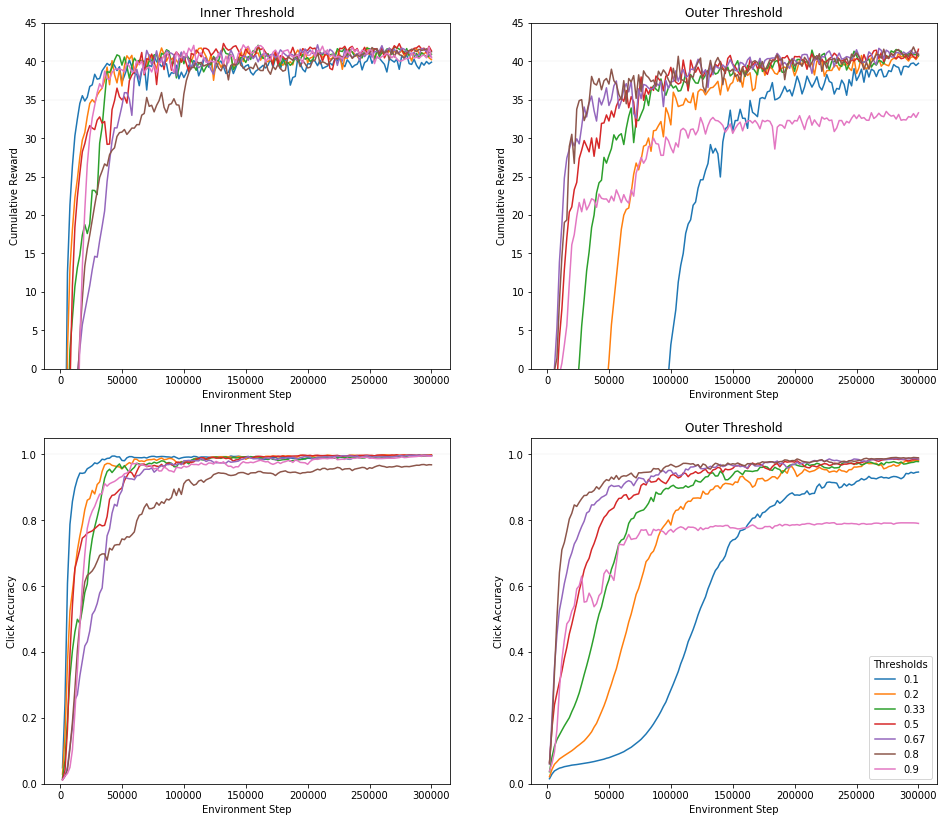

In [11]:
# Start Line Plot
fig = plt.figure()
plt.clf()

# Inner cumulative reward
plt.subplot(2, 2, 1)
plt.axhline(35, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(40, color='lightgrey', linewidth = 0.2, label='_nolegend_')
for session in range(7):
    plt.plot(sb_steps, sb_cum_array[session]['mean'])
plotInnerOutter(0, 45, 'Inner Threshold', 'Cumulative Reward') # y limit arguments (min/max), title, y_label

# Outer cumulative reward
plt.subplot(2, 2, 2)
plt.axhline(35, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(40, color='lightgrey', linewidth = 0.2, label='_nolegend_')
for session in range(7, len(sb_cum_array)):
    plt.plot(sb_steps, sb_cum_array[session]['mean'])
plotInnerOutter(0, 45, 'Outer Threshold', 'Cumulative Reward') # y limit arguments (min/max), title, y_label

# Inner Click Accuracy
plt.subplot(2, 2, 3)
plt.axhline(1, color='lightgrey', linewidth = 0.2, label='_nolegend_')
for session in range(7):
    plt.plot(sb_steps, sb_acc_array[session]['mean'])
plotInnerOutter(0, 1.05, 'Inner Threshold', 'Click Accuracy') # y limit arguments (min/max), title, y_label

# Outer Click Accuracy
plt.subplot(2, 2, 4)
plt.axhline(1, color='lightgrey', linewidth = 0.2, label='_nolegend_')
for session in range(7, len(sb_cum_array)):
    plt.plot(sb_steps, sb_acc_array[session]['mean'])
plotInnerOutter(0, 1.05, 'Outer Threshold', 'Click Accuracy') # y limit arguments (min/max), title, y_label
plt.legend(threshold_legend, title='Thresholds', loc='lower right')

fig = plt.gcf()
fig.set_size_inches(16, 14)
plt.show()
with PdfPages('./plots/sb_threshold_overview.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')

## Inner vs Outer Threshold (Mean)

In [12]:
# Function to prepare data
def combine_mean(dataframe):
    df = dataframe[0]['mean'].to_frame()
    df.columns = ['0']
    for session in range(1, len(dataframe)):
        df[str(session)] = dataframe[session]['mean']
    # Add mean
    df['mean'] = df.mean(axis=1)
    # Add std
    droppedMean = df.drop(['mean'], axis=1)
    df['std'] = droppedMean.std(axis=1)
    return df

### BRO Cumulative Reward
bro_cum_array_inner = combine_mean(bro_cum_array[0:7])
bro_cum_array_outer = combine_mean(bro_cum_array[7:len(bro_cum_array)])
### BRO Episode Length
bro_el_array_inner = combine_mean(bro_el_array[0:7])
bro_el_array_outer = combine_mean(bro_el_array[7:len(bro_el_array)])
### SB Cumulative Reward
sb_cum_array_inner = combine_mean(sb_cum_array[0:7])
sb_cum_array_outer = combine_mean(sb_cum_array[7:len(sb_cum_array)])
### SB Click Accuracy
sb_acc_array_inner = combine_mean(sb_acc_array[0:7])
sb_acc_array_outer = combine_mean(sb_acc_array[7:len(sb_acc_array)])

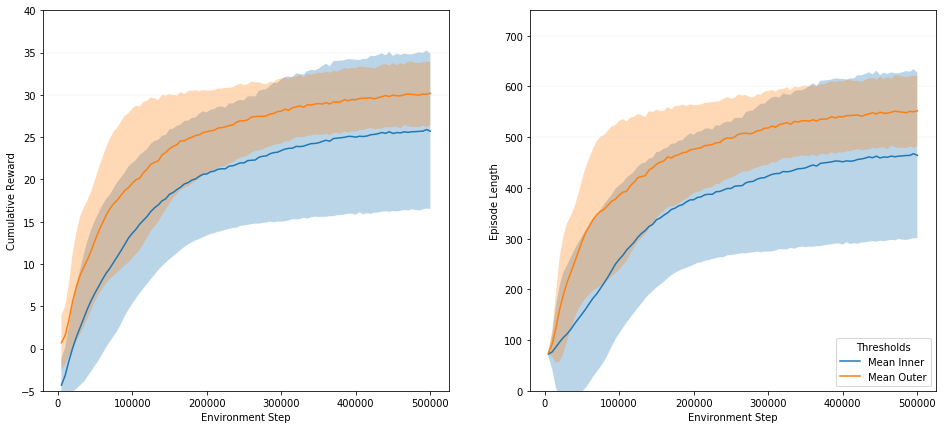

In [13]:
### BRO
fig = plt.figure()
plt.clf()

plt.subplot(1, 2, 1)
plt.axhline(35, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(30, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.plot(bro_steps, bro_cum_array_inner['mean'])
plt.fill_between(bro_steps[0], bro_cum_array_inner['mean']+bro_cum_array_inner['std'], bro_cum_array_inner['mean']-bro_cum_array_inner['std'], alpha=0.3)
plt.plot(bro_steps, bro_cum_array_outer['mean'])
plt.fill_between(bro_steps[0], bro_cum_array_outer['mean']+bro_cum_array_outer['std'], bro_cum_array_outer['mean']-bro_cum_array_outer['std'], alpha=0.3)
plt.ylim(-5, 40)
plt.xlabel('Environment Step')
plt.ylabel('Cumulative Reward')

plt.subplot(1, 2, 2)
plt.axhline(700, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(600, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(500, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.plot(bro_steps, bro_el_array_inner['mean'])
plt.fill_between(bro_steps[0], bro_el_array_inner['mean']+bro_el_array_inner['std'], bro_el_array_inner['mean']-bro_el_array_inner['std'], alpha=0.3)
plt.plot(bro_steps, bro_el_array_outer['mean'])
plt.fill_between(bro_steps[0], bro_el_array_outer['mean']+bro_el_array_outer['std'], bro_el_array_outer['mean']-bro_el_array_outer['std'], alpha=0.3)
plt.ylim(0, 750)
plt.xlabel('Environment Step')
plt.ylabel('Episode Length')
plt.legend(['Mean Inner', 'Mean Outer'], title='Thresholds', loc='lower right')

fig = plt.gcf()
fig.set_size_inches(16, 7)
plt.show()

with PdfPages('./plots/bro_threshold_inner_outer.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')

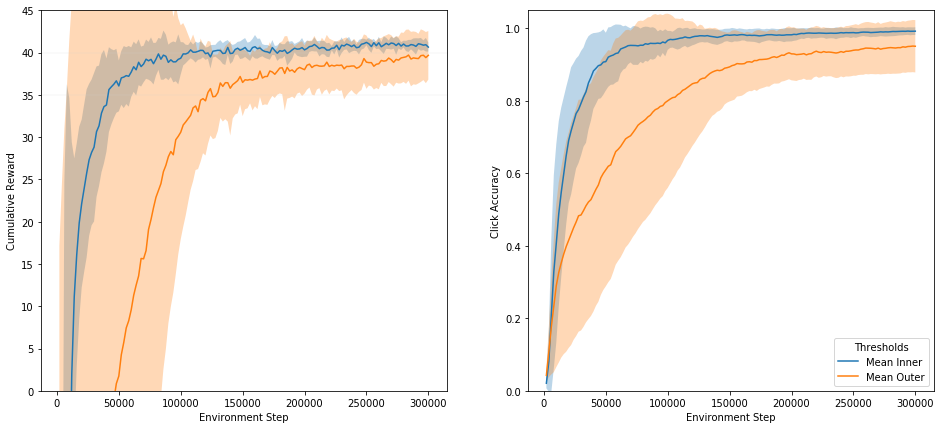

In [14]:
### SB
fig = plt.figure()
plt.clf()

plt.subplot(1, 2, 1)
plt.axhline(35, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(40, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.plot(sb_steps, sb_cum_array_inner['mean'])
plt.fill_between(sb_steps, sb_cum_array_inner['mean']+sb_cum_array_inner['std'], sb_cum_array_inner['mean']-sb_cum_array_inner['std'], alpha=0.3)
plt.plot(sb_steps, sb_cum_array_outer['mean'])
plt.fill_between(sb_steps, sb_cum_array_outer['mean']+sb_cum_array_outer['std'], sb_cum_array_outer['mean']-sb_cum_array_outer['std'], alpha=0.3)
plt.ylim(0, 45)
plt.xlabel('Environment Step')
plt.ylabel('Cumulative Reward')

plt.subplot(1, 2, 2)
plt.axhline(35, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(40, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.plot(sb_steps, sb_acc_array_inner['mean'])
plt.fill_between(sb_steps, sb_acc_array_inner['mean']+sb_acc_array_inner['std'], sb_acc_array_inner['mean']-sb_acc_array_inner['std'], alpha=0.3)
plt.plot(sb_steps, sb_acc_array_outer['mean'])
plt.fill_between(sb_steps, sb_acc_array_outer['mean']+sb_acc_array_outer['std'], sb_acc_array_outer['mean']-sb_acc_array_outer['std'], alpha=0.3)
plt.ylim(0, 1.05)
plt.xlabel('Environment Step')
plt.ylabel('Click Accuracy')
plt.legend(['Mean Inner', 'Mean Outer'], title='Thresholds', loc='lower right')

fig = plt.gcf()
fig.set_size_inches(16, 7)
plt.show()

with PdfPages('./plots/sb_threshold_inner_outer.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')

## Bucket Data
### BRO
Cumulative Reward and Episode Length

In [15]:
bro_b_cum_array = []# Cumulative Reward
bro_b_el_array = [] # Episode Length
bro_b_time_array = []

for session in range(len(bucket_sessions)):
    run_id = run_id_prefix_bro + run_id_prefix_b + bucket_sessions[session] 
    cum_values, times, bro_steps = processSummary(run_id, num_runs, 'Info/cumulative_reward', '', True)
    el_values, times, bro_steps = processSummary(run_id, num_runs, 'Info/episode_length', '', True)
    bro_b_cum_array.append(cum_values)
    bro_b_el_array.append(el_values)
    bro_b_time_array.append(times)

INFO:tensorflow:No path found after summaries/bro_buck_A-0/events.out.tfevents.1540215205.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_buck_A-1/events.out.tfevents.1540215204.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_buck_A-2/events.out.tfevents.1540215204.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_buck_A-3/events.out.tfevents.1540215205.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_buck_A-4/events.out.tfevents.1540215205.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_buck_A-5/events.out.tfevents.1540215204.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_buck_A-6/events.out.tfevents.1540215204.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_buck_A-7/events.out.tfevents.1540215204.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_buck_A-8/events.out.tfevents.1540215205.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_buck_A-9/events.out.tfe

INFO:tensorflow:No path found after summaries/bro_buck_E-0/events.out.tfevents.1540311425.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_buck_E-1/events.out.tfevents.1540311425.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_buck_E-2/events.out.tfevents.1540311425.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_buck_E-3/events.out.tfevents.1540311425.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_buck_E-4/events.out.tfevents.1540311425.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_buck_E-5/events.out.tfevents.1540311425.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_buck_E-6/events.out.tfevents.1540311425.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_buck_E-7/events.out.tfevents.1540311425.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_buck_E-8/events.out.tfevents.1540311425.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_buck_E-9/events.out.tfe

### Shooting Birds
Cumulative Reward and Click Accuracy

In [16]:
sb_b_cum_array = [] # Cumulative Reward
sb_b_time_array = []

for session in range(len(bucket_sessions)):
    run_id = run_id_prefix_sb + run_id_prefix_b + bucket_sessions[session] 
    cum_values, times, sb_steps = processSummary(run_id, num_runs, 'Info/cumulative_reward', '', True)
    sb_b_cum_array.append(cum_values)
    sb_b_time_array.append(times)

INFO:tensorflow:No path found after summaries/sb_buck_A-0/events.out.tfevents.1541203702.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_buck_A-1/events.out.tfevents.1541203702.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_buck_A-2/events.out.tfevents.1541203702.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_buck_A-3/events.out.tfevents.1541203702.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_buck_A-4/events.out.tfevents.1541203702.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_buck_A-5/events.out.tfevents.1541203702.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_buck_A-6/events.out.tfevents.1541203702.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_buck_A-7/events.out.tfevents.1541203702.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_buck_A-8/events.out.tfevents.1541203702.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_buck_A-9/events.out.tfevents.1541

In [17]:
sb_b_acc_array = []
for session in range(len(bucket_sessions)):
    run_id = run_id_prefix_sb + run_id_prefix_b + bucket_sessions[session] 
    accuracy, sb_steps = processCSV(run_id, ',', True)
    sb_b_acc_array.append(accuracy)

## Bucket Plots
### BRO
Cumulative Reward and Episode Length

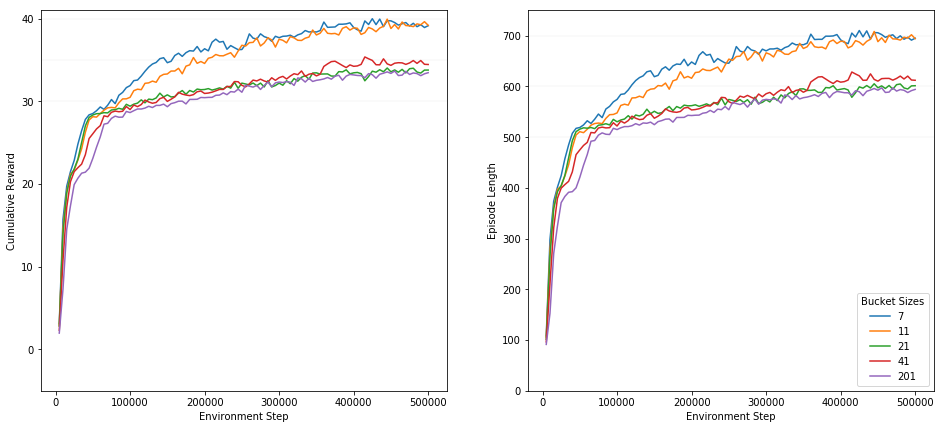

In [18]:
# Shared formatting
def plotBuckets(y_min_lim, y_max_lim, y_label):
    plt.ylim(y_min_lim, y_max_lim)
    plt.xlabel('Environment Step')
    plt.ylabel(y_label)

# Line Plot
fig = plt.figure()
plt.clf()

# Cumulative reward
plt.subplot(1, 2, 1)
plt.axhline(40, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(35, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(30, color='lightgrey', linewidth = 0.2, label='_nolegend_')
for session in range(len(bucket_sessions)):
    plt.plot(bro_steps, bro_b_cum_array[session]['mean'])
plotBuckets(-5, 41, 'Cumulative Reward')

# Episode length
plt.subplot(1, 2, 2)
plt.axhline(500, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(600, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(700, color='lightgrey', linewidth = 0.2, label='_nolegend_')
for session in range(len(bucket_sessions)):
    plt.plot(bro_steps, bro_b_el_array[session]['mean'])
plotBuckets(0, 750, 'Episode Length')
plt.legend(['7', '11', '21', '41', '201'], title='Bucket Sizes')

fig = plt.gcf()
fig.set_size_inches(16, 7)
plt.show()
with PdfPages('./plots/bro_bucket_overview.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')

### Shooting Birds

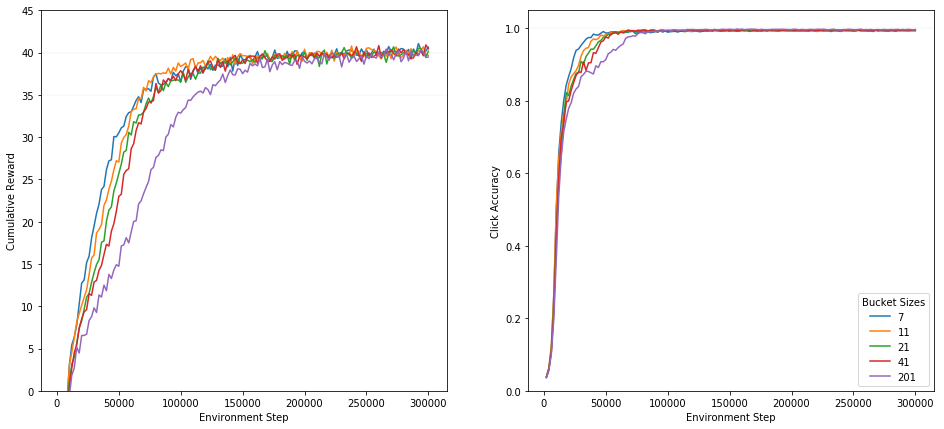

In [19]:
# Line Plot
fig = plt.figure()
plt.clf()

# Cumulative reward
plt.subplot(1, 2, 1)
plt.axhline(35, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(40, color='lightgrey', linewidth = 0.2, label='_nolegend_')
for session in range(len(bucket_sessions)):
    plt.plot(sb_steps, sb_b_cum_array[session]['mean'])
plotBuckets(0, 45, 'Cumulative Reward')

# Click Accuracy
plt.subplot(1, 2, 2)
plt.axhline(1, color='lightgrey', linewidth = 0.2, label='_nolegend_')
for session in range(len(bucket_sessions)):
    plt.plot(sb_steps, sb_b_acc_array[session]['mean'])
plotBuckets(0, 1.05, 'Click Accuracy')
plt.legend(['7', '11', '21', '41', '201'], title='Bucket Sizes')

fig = plt.gcf()
fig.set_size_inches(16, 7)
plt.show()
with PdfPages('./plots/sb_bucket_overview.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')

## Threshold vs Bucket

In [20]:
### BRO Cumulative Reward
bro_thresh_cum_all = combine_mean(bro_cum_array)
bro_b_cum_all = combine_mean(bro_b_cum_array)
### BRO Episode Length
bro_thresh_el_all = combine_mean(bro_el_array)
bro_b_el_all = combine_mean(bro_b_el_array)
### SB Cumulative Reward
sb_thresh_cum_all = combine_mean(sb_cum_array)
sb_b_cum_all = combine_mean(sb_b_cum_array)
### SB Click Accuracy
sb_thresh_acc_all = combine_mean(sb_acc_array)
sb_b_acc_all = combine_mean(sb_b_acc_array)

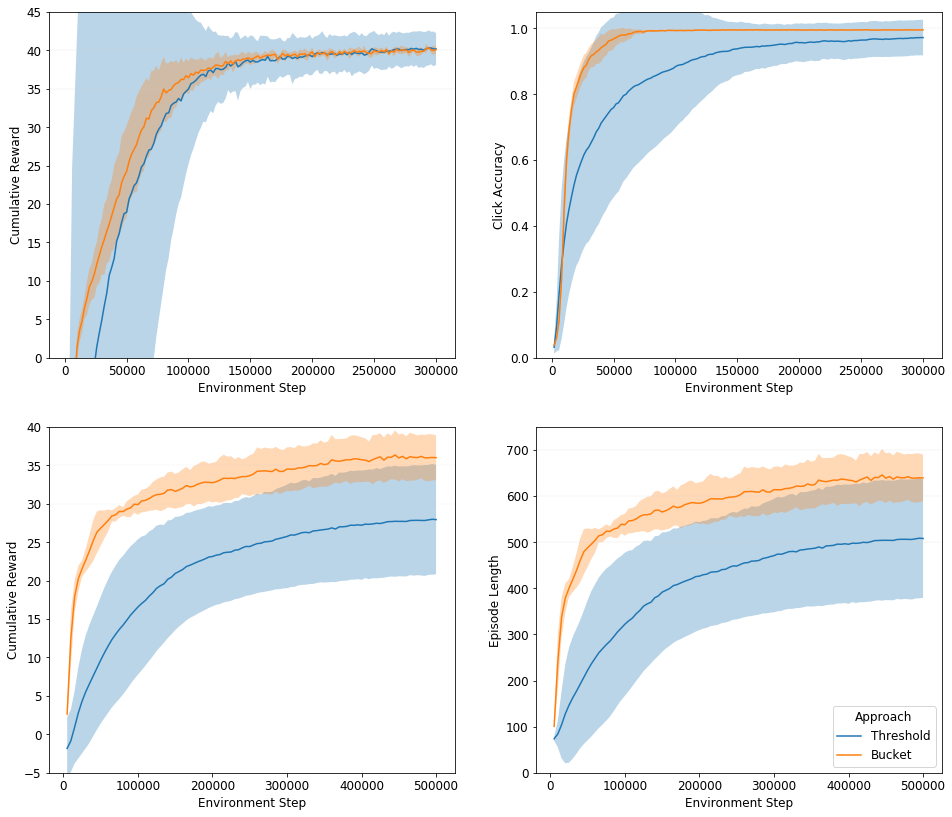

In [39]:
# Start Line Plot
fig = plt.figure()
plt.clf()

# SB Cumulative Reward T vs B
plt.subplot(2, 2, 1)
plt.axhline(35, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(40, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.plot(sb_steps, sb_thresh_cum_all['mean'])
plt.fill_between(sb_steps, sb_thresh_cum_all['mean']+sb_thresh_cum_all['std'], sb_thresh_cum_all['mean']-sb_thresh_cum_all['std'], alpha=0.3)
plt.plot(sb_steps, sb_b_cum_all['mean'])
plt.fill_between(sb_steps, sb_b_cum_all['mean']+sb_b_cum_all['std'], sb_b_cum_all['mean']-sb_b_cum_all['std'], alpha=0.3)
plt.ylim(0, 45)
plt.xlabel('Environment Step')
plt.ylabel('Cumulative Reward')

# SB Click Accuracy T vs B
plt.subplot(2, 2, 2)
plt.axhline(1, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.plot(sb_steps, sb_thresh_acc_all['mean'])
plt.fill_between(sb_steps, sb_thresh_acc_all['mean']+sb_thresh_acc_all['std'], sb_thresh_acc_all['mean']-sb_thresh_acc_all['std'], alpha=0.3)
plt.plot(sb_steps, sb_b_acc_all['mean'])
plt.fill_between(sb_steps, sb_b_acc_all['mean']+sb_b_acc_all['std'], sb_b_acc_all['mean']-sb_b_acc_all['std'], alpha=0.3)

plt.ylim(0, 1.05)
plt.xlabel('Environment Step')
plt.ylabel('Click Accuracy')

# BRO Cumulative reward T vs B
plt.subplot(2, 2, 3)
plt.axhline(35, color='lightgrey', linewidth = 0.1, label='_nolegend_')
plt.axhline(30, color='lightgrey', linewidth = 0.1, label='_nolegend_')
plt.plot(bro_steps, bro_thresh_cum_all['mean'])
plt.fill_between(bro_steps[0], bro_thresh_cum_all['mean']+bro_thresh_cum_all['std'], bro_thresh_cum_all['mean']-bro_thresh_cum_all['std'], alpha=0.3)
plt.plot(bro_steps, bro_b_cum_all['mean'])
plt.fill_between(bro_steps[0], bro_b_cum_all['mean']+bro_b_cum_all['std'], bro_b_cum_all['mean']-bro_b_cum_all['std'], alpha=0.3)
plt.ylim(-5, 40)
plt.xlabel('Environment Step')
plt.ylabel('Cumulative Reward')

# BRO Episode Length T vs B
plt.subplot(2, 2, 4)
plt.axhline(700, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(600, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(500, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.plot(bro_steps, bro_thresh_el_all['mean'])
plt.fill_between(bro_steps[0], bro_thresh_el_all['mean']+bro_thresh_el_all['std'], bro_thresh_el_all['mean']-bro_thresh_el_all['std'], alpha=0.3)
plt.plot(bro_steps, bro_b_el_all['mean'])
plt.fill_between(bro_steps[0], bro_b_el_all['mean']+bro_b_el_all['std'], bro_b_el_all['mean']-bro_b_el_all['std'], alpha=0.3)
plt.ylim(0, 750)
plt.xlabel('Environment Step')
plt.ylabel('Episode Length')
plt.legend(['Threshold', 'Bucket'], title='Approach', loc='lower right')

fig = plt.gcf()
fig.set_size_inches(16, 14)
plt.show()
with PdfPages('./plots/threshold_vs_bucket.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')

## Multi-Agent SB

Read data

In [22]:
sb_m_cum_array = [] # Cumulative Reward
sb_m_time_array = []

for session in range(len(sb_mult_sessions)):
    run_id = run_id_prefix_sb + run_id_prefix_m + sb_mult_sessions[session]
    cum_values, times, sb_steps = processSummary(run_id, num_runs, 'Info/cumulative_reward', '_ShootingBirdsShootingBrain', True)
    sb_m_cum_array.append(cum_values)
    sb_m_time_array.append(times)
    
sb_m_acc_array = []
for session in range(len(sb_mult_sessions)):
    run_id = run_id_prefix_sb + run_id_prefix_m + sb_mult_sessions[session] 
    accuracy, sb_steps = processCSV(run_id, ',', True)
    sb_m_acc_array.append(accuracy)

INFO:tensorflow:No path found after summaries/sb_mult_A-0_ShootingBirdsShootingBrain/events.out.tfevents.1541226501.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_mult_A-1_ShootingBirdsShootingBrain/events.out.tfevents.1541226501.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_mult_A-2_ShootingBirdsShootingBrain/events.out.tfevents.1541226501.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_mult_A-3_ShootingBirdsShootingBrain/events.out.tfevents.1541226501.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_mult_A-4_ShootingBirdsShootingBrain/events.out.tfevents.1541226501.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_mult_A-5_ShootingBirdsShootingBrain/events.out.tfevents.1541226500.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_mult_A-6_ShootingBirdsShootingBrain/events.out.tfevents.1541226501.96d259f1e299
INFO:tensorflow:No path found after summaries/sb_mult_A-7_ShootingBirdsShootingBrain/events.out.t

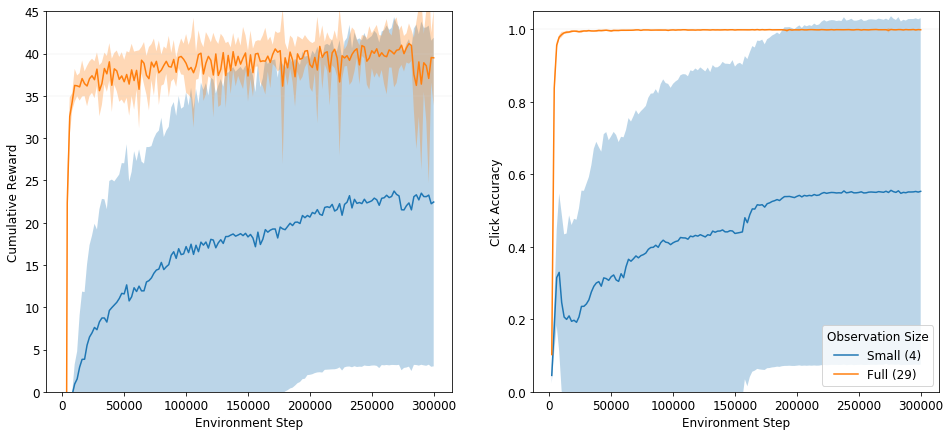

In [34]:
# Start Line Plot
fig = plt.figure()
plt.clf()

# Cumulative Reward
plt.subplot(1, 2, 1)
plt.axhline(35, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(40, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.plot(sb_steps, sb_m_cum_array[0]['mean'])
plt.fill_between(sb_steps, sb_m_cum_array[0]['mean']+sb_m_cum_array[0]['std'], sb_m_cum_array[0]['mean']-sb_m_cum_array[0]['std'], alpha=0.3)
plt.plot(sb_steps, sb_m_cum_array[1]['mean'])
plt.fill_between(sb_steps, sb_m_cum_array[1]['mean']+sb_m_cum_array[1]['std'], sb_m_cum_array[1]['mean']-sb_m_cum_array[1]['std'], alpha=0.3)
plt.ylim(0, 45)
plt.xlabel('Environment Step')
plt.ylabel('Cumulative Reward')

# Click accuracy
plt.subplot(1, 2, 2)
plt.axhline(1, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.plot(sb_steps, sb_m_acc_array[0]['mean'])
plt.fill_between(sb_steps, sb_m_acc_array[0]['mean']+sb_m_acc_array[0]['std'], sb_m_acc_array[0]['mean']-sb_m_acc_array[0]['std'], alpha=0.3)
plt.plot(sb_steps, sb_m_acc_array[1]['mean'])
plt.fill_between(sb_steps, sb_m_acc_array[1]['mean']+sb_m_acc_array[1]['std'], sb_m_acc_array[1]['mean']-sb_m_acc_array[1]['std'], alpha=0.3)
plt.ylim(0, 1.05)
plt.xlabel('Environment Step')
plt.ylabel('Click Accuracy')
plt.legend(['Small (4)', 'Full (29)'], title='Observation Size')

fig = plt.gcf()
fig.set_size_inches(16, 7)
plt.show()
with PdfPages('./plots/sb_mult_overview.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')

## Multi-Agent BRO

Read data

In [24]:
bro_m_cum_array = [] # Cumulative Reward
bro_m_el_array = [] # Episode Length
bro_m_time_array = []

for session in range(len(bro_mult_sessions)):
    run_id = run_id_prefix_bro + run_id_prefix_m + bro_mult_sessions[session]
    cum_values, times, bro_steps = processSummary(run_id, num_runs, 'Info/cumulative_reward', '_BROClickBrain', True)
    el_values, times, bro_steps = processSummary(run_id, num_runs, 'Info/episode_length', '_BROClickBrain', True)
    bro_m_cum_array.append(cum_values)
    bro_m_el_array.append(el_values)
    bro_m_time_array.append(times)

INFO:tensorflow:No path found after summaries/bro_mult_A-0_BROClickBrain/events.out.tfevents.1540897860.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_mult_A-1_BROClickBrain/events.out.tfevents.1540897860.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_mult_A-2_BROClickBrain/events.out.tfevents.1540897860.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_mult_A-3_BROClickBrain/events.out.tfevents.1540897860.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_mult_A-4_BROClickBrain/events.out.tfevents.1540897860.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_mult_A-5_BROClickBrain/events.out.tfevents.1540897860.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_mult_A-6_BROClickBrain/events.out.tfevents.1540897860.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_mult_A-7_BROClickBrain/events.out.tfevents.1540897860.fcce7fa0f2c8
INFO:tensorflow:No path found after summaries/bro_mult_A-8_BROCl

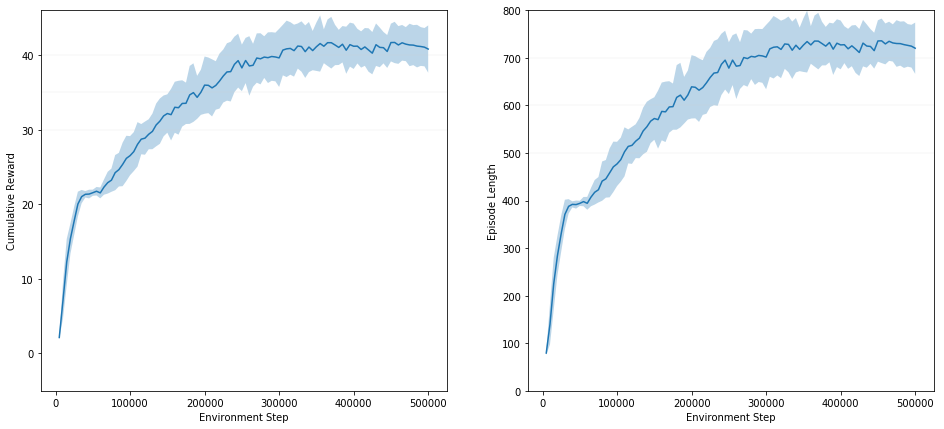

In [25]:
# Start Line Plot
fig = plt.figure()
plt.clf()

# Cumulative Reward
plt.subplot(1, 2, 1)
plt.axhline(40, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(35, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(30, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.plot(bro_steps, bro_m_cum_array[0]['mean'])
plt.fill_between(bro_steps[0], bro_m_cum_array[0]['mean']+bro_m_cum_array[0]['std'], bro_m_cum_array[0]['mean']-bro_m_cum_array[0]['std'], alpha=0.3)
plt.ylim(-5, 46)
plt.xlabel('Environment Step')
plt.ylabel('Cumulative Reward')

# Click accuracy
plt.subplot(1, 2, 2)
plt.axhline(800, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(700, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(600, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(500, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.plot(bro_steps, bro_m_el_array[0]['mean'])
plt.fill_between(bro_steps[0], bro_m_el_array[0]['mean']+bro_m_el_array[0]['std'], bro_m_el_array[0]['mean']-bro_m_el_array[0]['std'], alpha=0.3)
plt.ylim(0, 800)
plt.xlabel('Environment Step')
plt.ylabel('Episode Length')
#plt.legend(['Small (4)', 'Medium (6)', 'Large (30)'], title='Observation Size')

fig = plt.gcf()
fig.set_size_inches(16, 7)
plt.show()
with PdfPages('./plots/bro_mult_overview.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')

## All

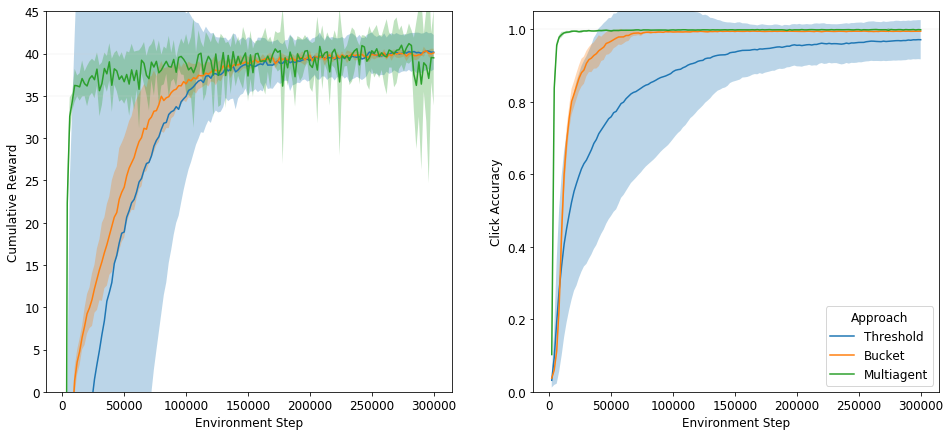

In [47]:
# Start Line Plot
fig = plt.figure()
plt.clf()

# SB Cumulative Reward T vs B
plt.subplot(1, 2, 1)
plt.axhline(35, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(40, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.plot(sb_steps, sb_thresh_cum_all['mean'])
plt.fill_between(sb_steps, sb_thresh_cum_all['mean']+sb_thresh_cum_all['std'], sb_thresh_cum_all['mean']-sb_thresh_cum_all['std'], alpha=0.3)
plt.plot(sb_steps, sb_b_cum_all['mean'])
plt.fill_between(sb_steps, sb_b_cum_all['mean']+sb_b_cum_all['std'], sb_b_cum_all['mean']-sb_b_cum_all['std'], alpha=0.3)
plt.plot(sb_steps, sb_m_cum_array[1]['mean'])
plt.fill_between(sb_steps, sb_m_cum_array[1]['mean']+sb_m_cum_array[1]['std'], sb_m_cum_array[1]['mean']-sb_m_cum_array[1]['std'], alpha=0.3)
plt.ylim(0, 45)
plt.xlabel('Environment Step')
plt.ylabel('Cumulative Reward')

# SB Click Accuracy T vs B
plt.subplot(1, 2, 2)
plt.axhline(1, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.plot(sb_steps, sb_thresh_acc_all['mean'])
plt.fill_between(sb_steps, sb_thresh_acc_all['mean']+sb_thresh_acc_all['std'], sb_thresh_acc_all['mean']-sb_thresh_acc_all['std'], alpha=0.3)
plt.plot(sb_steps, sb_b_acc_all['mean'])
plt.fill_between(sb_steps, sb_b_acc_all['mean']+sb_b_acc_all['std'], sb_b_acc_all['mean']-sb_b_acc_all['std'], alpha=0.3)
plt.plot(sb_steps, sb_m_acc_array[1]['mean'])
plt.fill_between(sb_steps, sb_m_acc_array[1]['mean']+sb_m_acc_array[1]['std'], sb_m_acc_array[1]['mean']-sb_m_acc_array[1]['std'], alpha=0.3)
plt.ylim(0, 1.05)
plt.xlabel('Environment Step')
plt.ylabel('Click Accuracy')
plt.legend(['Threshold', 'Bucket', 'Multiagent'], title='Approach', loc='lower right')

fig = plt.gcf()
fig.set_size_inches(16, 7)
plt.show()
with PdfPages('./plots/sb_all_approaches.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')

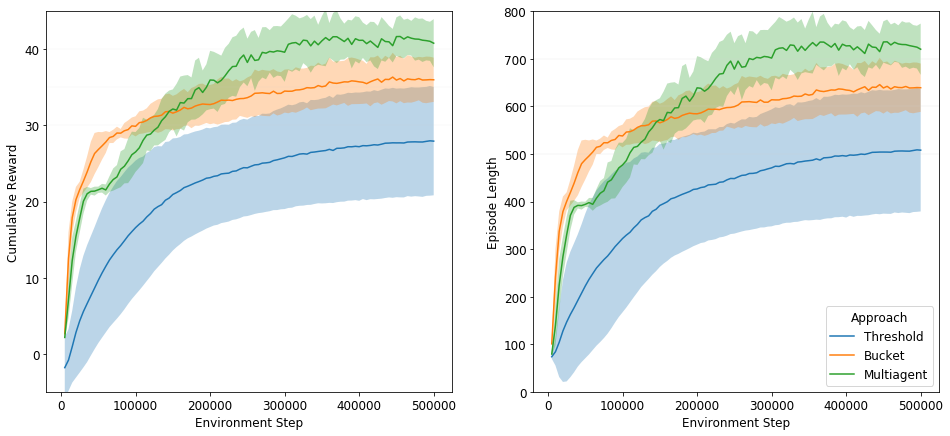

In [61]:
# Start Line Plot
fig = plt.figure()
plt.clf()

# BRO Cumulative reward T vs B
plt.subplot(1, 2, 1)
plt.axhline(40, color='lightgrey', linewidth = 0.1, label='_nolegend_')
plt.axhline(35, color='lightgrey', linewidth = 0.1, label='_nolegend_')
plt.axhline(30, color='lightgrey', linewidth = 0.1, label='_nolegend_')
plt.plot(bro_steps, bro_thresh_cum_all['mean'])
plt.fill_between(bro_steps[0], bro_thresh_cum_all['mean']+bro_thresh_cum_all['std'], bro_thresh_cum_all['mean']-bro_thresh_cum_all['std'], alpha=0.3)
plt.plot(bro_steps, bro_b_cum_all['mean'])
plt.fill_between(bro_steps[0], bro_b_cum_all['mean']+bro_b_cum_all['std'], bro_b_cum_all['mean']-bro_b_cum_all['std'], alpha=0.3)
plt.plot(bro_steps, bro_m_cum_array[0]['mean'])
plt.fill_between(bro_steps[0], bro_m_cum_array[0]['mean']+bro_m_cum_array[0]['std'], bro_m_cum_array[0]['mean']-bro_m_cum_array[0]['std'], alpha=0.3)
plt.ylim(-5, 45)
plt.xlabel('Environment Step')
plt.ylabel('Cumulative Reward')

# BRO Episode Length T vs B
plt.subplot(1, 2, 2)
plt.axhline(700, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(600, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(500, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.plot(bro_steps, bro_thresh_el_all['mean'])
plt.fill_between(bro_steps[0], bro_thresh_el_all['mean']+bro_thresh_el_all['std'], bro_thresh_el_all['mean']-bro_thresh_el_all['std'], alpha=0.3)
plt.plot(bro_steps, bro_b_el_all['mean'])
plt.fill_between(bro_steps[0], bro_b_el_all['mean']+bro_b_el_all['std'], bro_b_el_all['mean']-bro_b_el_all['std'], alpha=0.3)
plt.plot(bro_steps, bro_m_el_array[0]['mean'])
plt.fill_between(bro_steps[0], bro_m_el_array[0]['mean']+bro_m_el_array[0]['std'], bro_m_el_array[0]['mean']-bro_m_el_array[0]['std'], alpha=0.3)
plt.ylim(0, 800)
plt.xlabel('Environment Step')
plt.ylabel('Episode Length')
plt.legend(['Threshold', 'Bucket', 'Multiagent'], title='Approach', loc='lower right')

fig = plt.gcf()
fig.set_size_inches(16, 7)
plt.show()
with PdfPages('./plots/bro_all_approaches.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')

## Compare best results

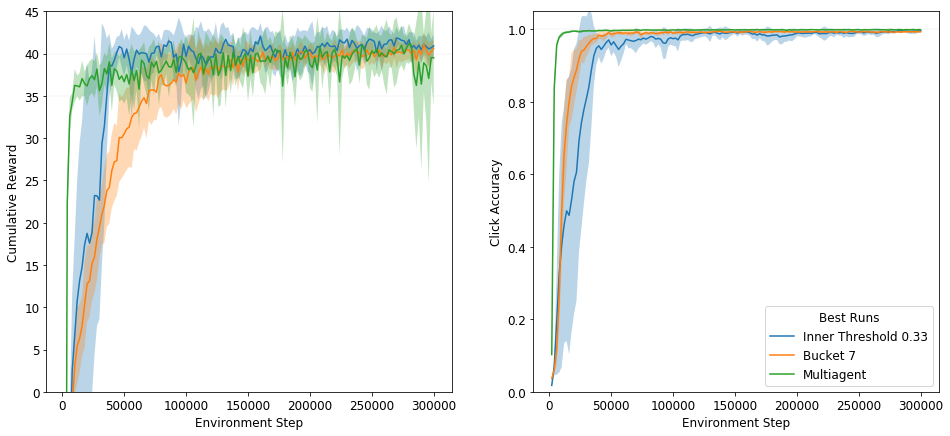

In [53]:
# Start Line Plot
fig = plt.figure()
plt.clf()

# SB Cumulative Reward T vs B
plt.subplot(1, 2, 1)
plt.axhline(35, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(40, color='lightgrey', linewidth = 0.2, label='_nolegend_')
# Thresh 0.33
plt.plot(sb_steps, sb_cum_array[2]['mean'])
plt.fill_between(sb_steps, sb_cum_array[2]['mean']+sb_cum_array[2]['std'], sb_cum_array[2]['mean']-sb_cum_array[2]['std'], alpha=0.3)
# Bucket 7
plt.plot(sb_steps, sb_b_cum_array[0]['mean'])
plt.fill_between(sb_steps, sb_b_cum_array[0]['mean']+sb_b_cum_array[0]['std'], sb_b_cum_array[0]['mean']-sb_b_cum_array[0]['std'], alpha=0.3)
# Multiagent
plt.plot(sb_steps, sb_m_cum_array[1]['mean'])
plt.fill_between(sb_steps, sb_m_cum_array[1]['mean']+sb_m_cum_array[1]['std'], sb_m_cum_array[1]['mean']-sb_m_cum_array[1]['std'], alpha=0.3)
plt.ylim(0, 45)
plt.xlabel('Environment Step')
plt.ylabel('Cumulative Reward')

# SB Click Accuracy T vs B
plt.subplot(1, 2, 2)
plt.axhline(1, color='lightgrey', linewidth = 0.2, label='_nolegend_')
# Thresh 0.33
plt.plot(sb_steps, sb_acc_array[2]['mean'])
plt.fill_between(sb_steps, sb_acc_array[2]['mean']+sb_acc_array[2]['std'], sb_acc_array[2]['mean']-sb_acc_array[2]['std'], alpha=0.3)
# Bucket 7
plt.plot(sb_steps, sb_b_acc_array[0]['mean'])
plt.fill_between(sb_steps, sb_b_acc_array[0]['mean']+sb_b_acc_array[0]['std'], sb_b_acc_array[0]['mean']-sb_b_acc_array[0]['std'], alpha=0.3)
# Multiagent
plt.plot(sb_steps, sb_m_acc_array[1]['mean'])
plt.fill_between(sb_steps, sb_m_acc_array[1]['mean']+sb_m_acc_array[1]['std'], sb_m_acc_array[1]['mean']-sb_m_acc_array[1]['std'], alpha=0.3)
plt.ylim(0, 1.05)
plt.xlabel('Environment Step')
plt.ylabel('Click Accuracy')
plt.legend(['Inner Threshold 0.33', 'Bucket 7', 'Multiagent'], title='Best Runs', loc='lower right')

fig = plt.gcf()
fig.set_size_inches(16, 7)
plt.show()
with PdfPages('./plots/sb_best_all_approaches.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')

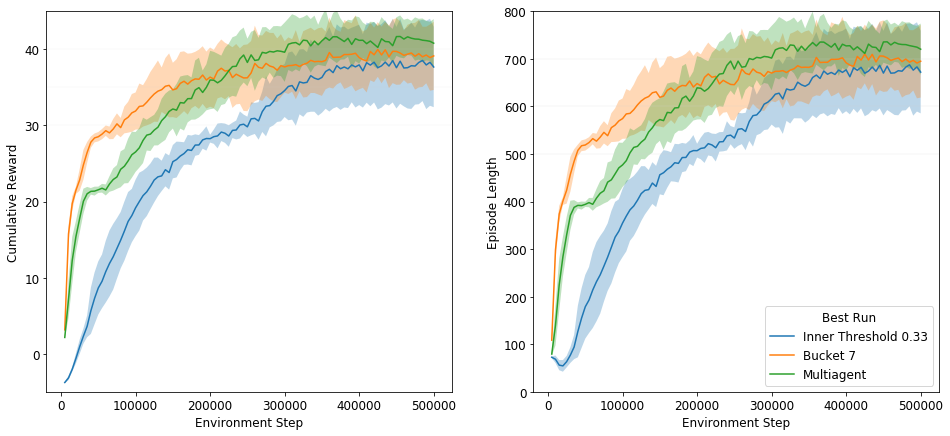

In [58]:
# Start Line Plot
fig = plt.figure()
plt.clf()

# BRO Cumulative reward T vs B
plt.subplot(1, 2, 1)
plt.axhline(40, color='lightgrey', linewidth = 0.1, label='_nolegend_')
plt.axhline(35, color='lightgrey', linewidth = 0.1, label='_nolegend_')
plt.axhline(30, color='lightgrey', linewidth = 0.1, label='_nolegend_')
# Thresh 0.33
plt.plot(bro_steps, bro_cum_array[2]['mean'])
plt.fill_between(bro_steps[0], bro_cum_array[2]['mean']+bro_cum_array[2]['std'], bro_cum_array[2]['mean']-bro_cum_array[2]['std'], alpha=0.3)
# Bucket 7
plt.plot(bro_steps, bro_b_cum_array[0]['mean'])
plt.fill_between(bro_steps[0], bro_b_cum_array[0]['mean']+bro_b_cum_array[0]['std'], bro_b_cum_array[0]['mean']-bro_b_cum_array[0]['std'], alpha=0.3)
# Multiagent
plt.plot(bro_steps, bro_m_cum_array[0]['mean'])
plt.fill_between(bro_steps[0], bro_m_cum_array[0]['mean']+bro_m_cum_array[0]['std'], bro_m_cum_array[0]['mean']-bro_m_cum_array[0]['std'], alpha=0.3)
plt.ylim(-5, 45)
plt.xlabel('Environment Step')
plt.ylabel('Cumulative Reward')

# BRO Episode Length T vs B
plt.subplot(1, 2, 2)
plt.axhline(700, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(600, color='lightgrey', linewidth = 0.2, label='_nolegend_')
plt.axhline(500, color='lightgrey', linewidth = 0.2, label='_nolegend_')
# Thresh 0.33
plt.plot(bro_steps, bro_el_array[2]['mean'])
plt.fill_between(bro_steps[0], bro_el_array[2]['mean']+bro_el_array[2]['std'], bro_el_array[2]['mean']-bro_el_array[2]['std'], alpha=0.3)
# Bucket 7
plt.plot(bro_steps, bro_b_el_array[0]['mean'])
plt.fill_between(bro_steps[0], bro_b_el_array[0]['mean']+bro_b_el_array[0]['std'], bro_b_el_array[0]['mean']-bro_b_el_array[0]['std'], alpha=0.3)
# Multiagent
plt.plot(bro_steps, bro_m_el_array[0]['mean'])
plt.fill_between(bro_steps[0], bro_m_el_array[0]['mean']+bro_m_el_array[0]['std'], bro_m_el_array[0]['mean']-bro_m_el_array[0]['std'], alpha=0.3)
plt.ylim(0, 800)
plt.xlabel('Environment Step')
plt.ylabel('Episode Length')
plt.legend(['Inner Threshold 0.33', 'Bucket 7', 'Multiagent'], title='Best Run', loc='lower right')

fig = plt.gcf()
fig.set_size_inches(16, 7)
plt.show()
with PdfPages('./plots/bro_best_all_approaches.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')

## BRO Single Std Results for Annex

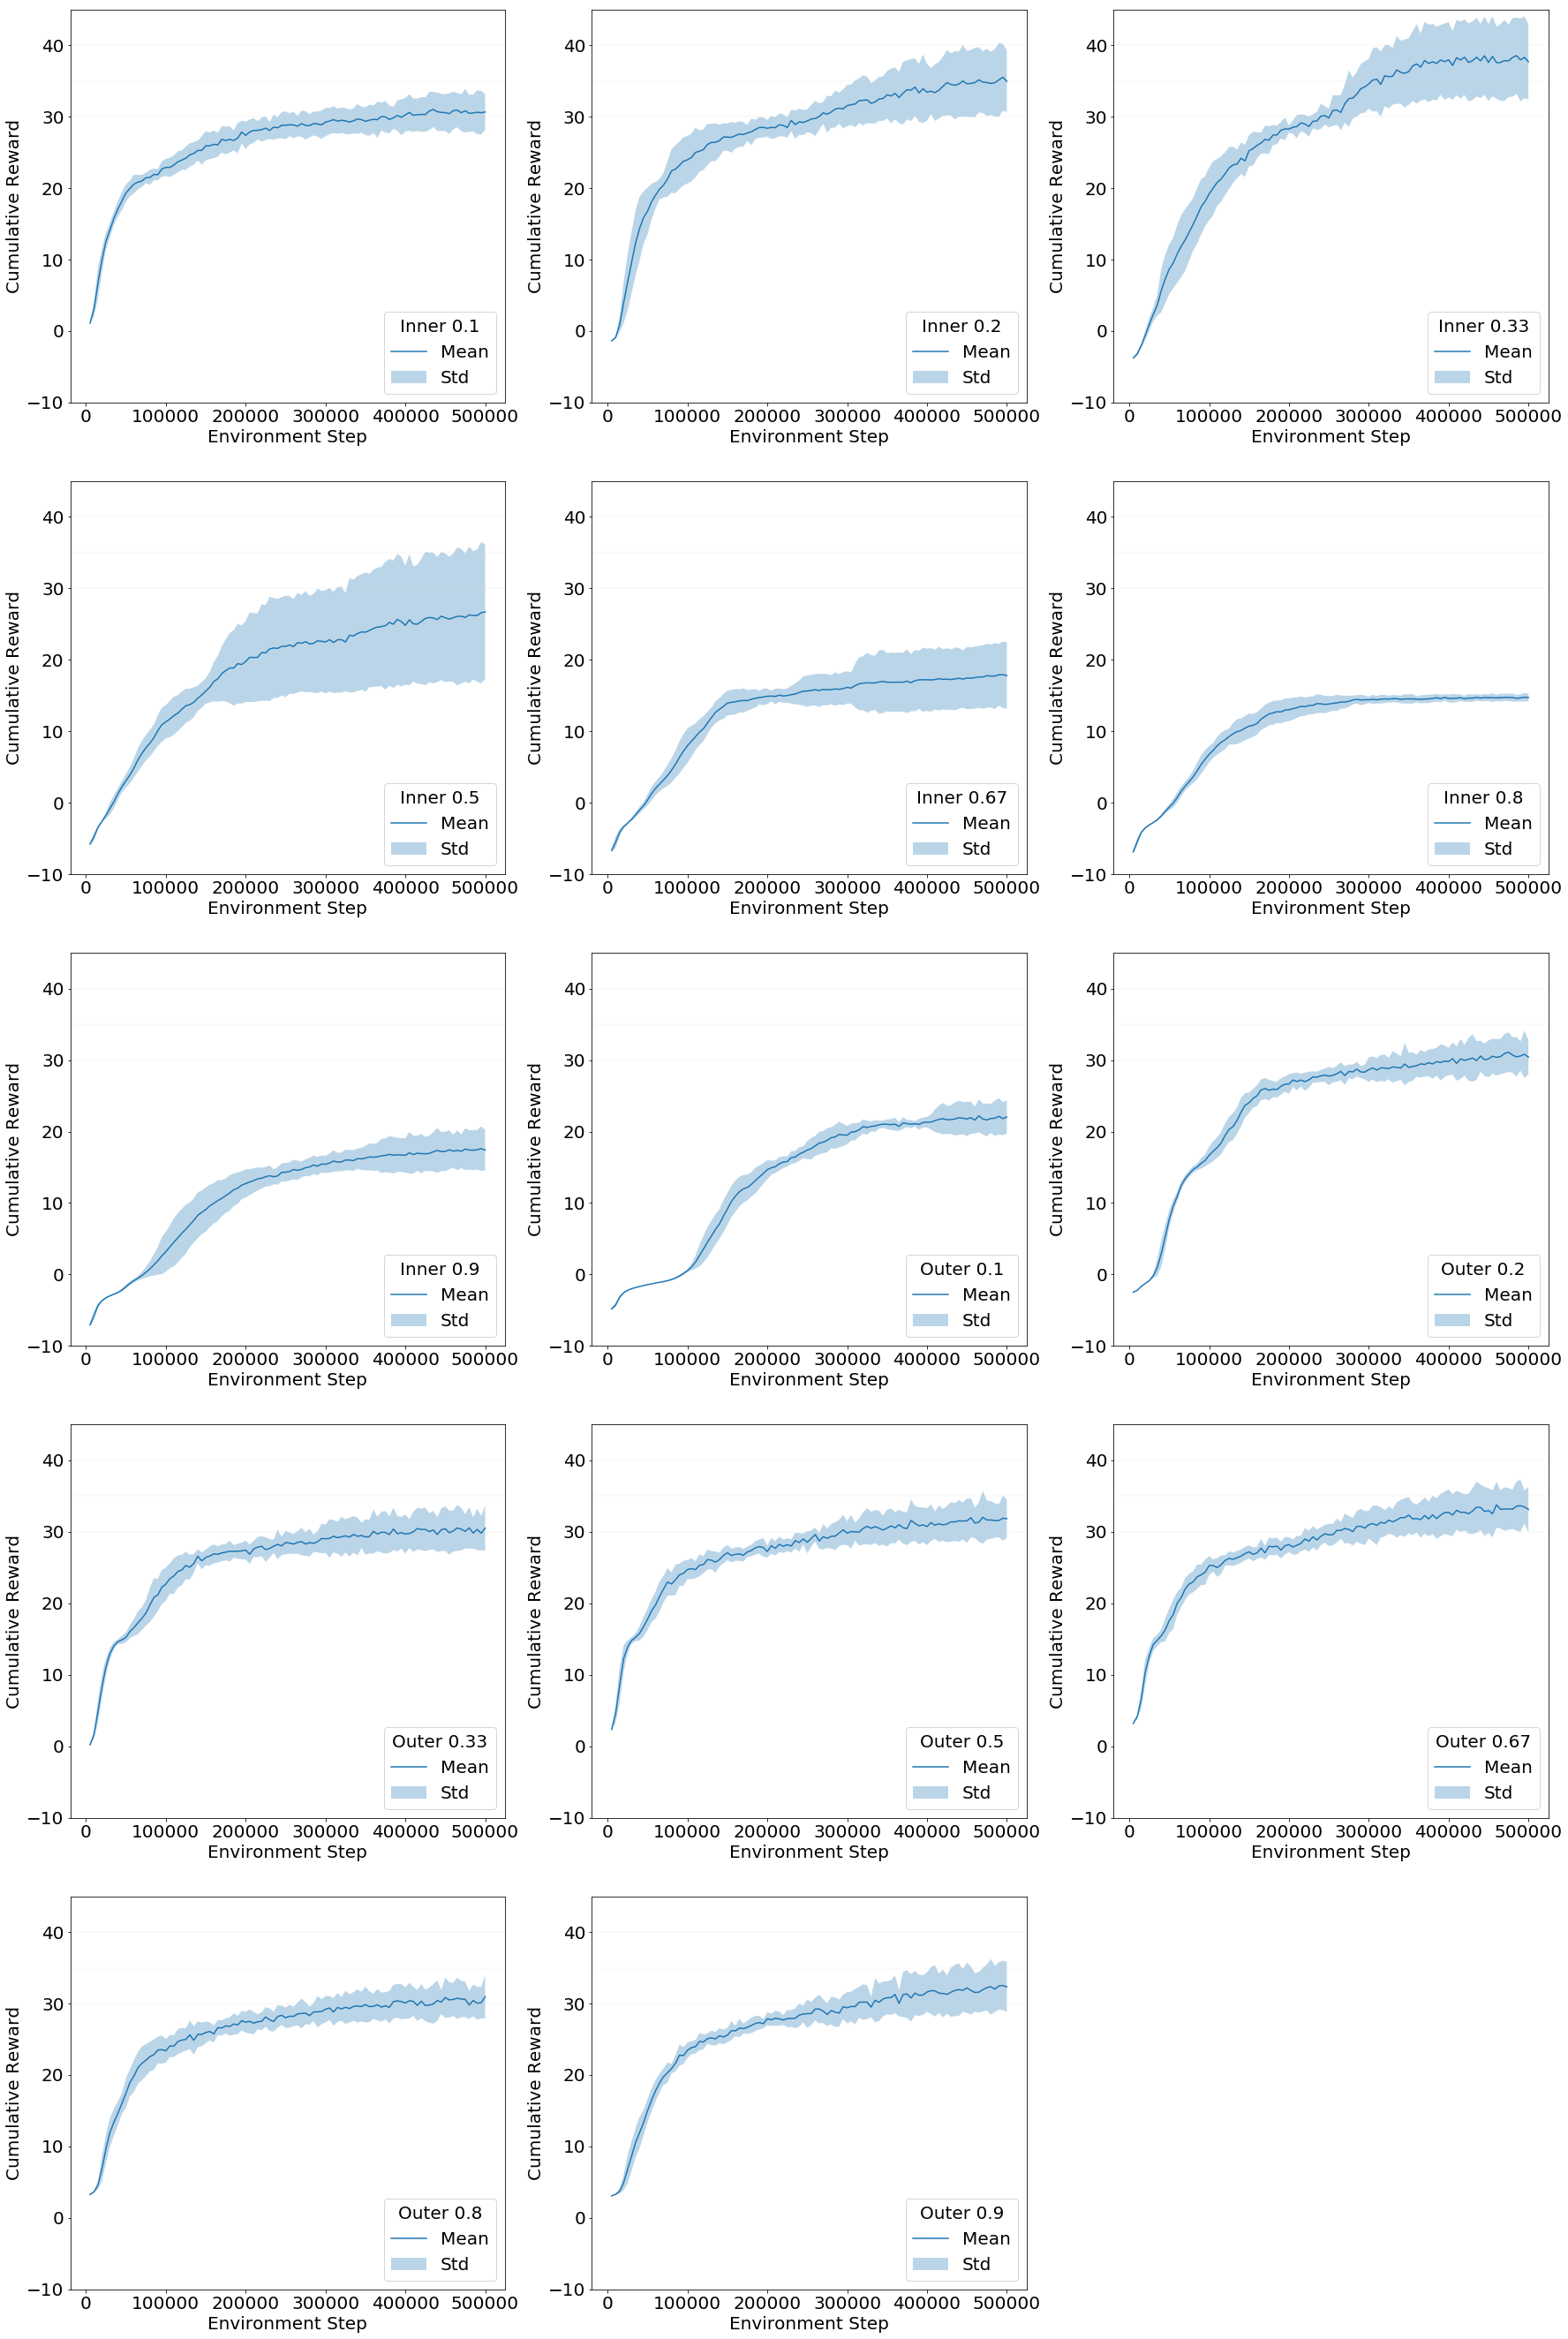

In [26]:
def singleThreshResult(steps, mean, std, title, y_min_lim, y_max_lim):
    plt.axhline(30, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.axhline(35, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.axhline(40, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.plot(steps, mean)
    plt.fill_between(steps[0], mean+std, mean-std, alpha=0.3)
    plt.ylim(y_min_lim, y_max_lim)
    plt.xlabel('Environment Step')
    plt.ylabel('Cumulative Reward')
    plt.legend(['Mean', 'Std'], title=title, loc='lower right')

# Font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure()
plt.clf()

# INNER
plt.subplot(5, 3, 1)
singleThreshResult(bro_steps, bro_cum_array[0]['mean'], bro_cum_array[0]['std'], 'Inner 0.1', -10, 45)

plt.subplot(5, 3, 2)
singleThreshResult(bro_steps, bro_cum_array[1]['mean'], bro_cum_array[1]['std'], 'Inner 0.2', -10, 45)

plt.subplot(5, 3, 3)
singleThreshResult(bro_steps, bro_cum_array[2]['mean'], bro_cum_array[2]['std'], 'Inner 0.33', -10, 45)

plt.subplot(5, 3, 4)
singleThreshResult(bro_steps, bro_cum_array[3]['mean'], bro_cum_array[3]['std'], 'Inner 0.5', -10, 45)

plt.subplot(5, 3, 5)
singleThreshResult(bro_steps, bro_cum_array[4]['mean'], bro_cum_array[4]['std'], 'Inner 0.67', -10, 45)

plt.subplot(5, 3, 6)
singleThreshResult(bro_steps, bro_cum_array[5]['mean'], bro_cum_array[5]['std'], 'Inner 0.8', -10, 45)

plt.subplot(5, 3, 7)
singleThreshResult(bro_steps, bro_cum_array[6]['mean'], bro_cum_array[6]['std'], 'Inner 0.9', -10, 45)

# OUTER
plt.subplot(5, 3, 8)
singleThreshResult(bro_steps, bro_cum_array[7]['mean'], bro_cum_array[7]['std'], 'Outer 0.1', -10, 45)

plt.subplot(5, 3, 9)
singleThreshResult(bro_steps, bro_cum_array[8]['mean'], bro_cum_array[8]['std'], 'Outer 0.2', -10, 45)

plt.subplot(5, 3, 10)
singleThreshResult(bro_steps, bro_cum_array[9]['mean'], bro_cum_array[9]['std'], 'Outer 0.33', -10, 45)

plt.subplot(5, 3, 11)
singleThreshResult(bro_steps, bro_cum_array[10]['mean'], bro_cum_array[10]['std'], 'Outer 0.5', -10, 45)

plt.subplot(5, 3, 12)
singleThreshResult(bro_steps, bro_cum_array[11]['mean'], bro_cum_array[11]['std'], 'Outer 0.67', -10, 45)

plt.subplot(5, 3, 13)
singleThreshResult(bro_steps, bro_cum_array[12]['mean'], bro_cum_array[12]['std'], 'Outer 0.8', -10, 45)

plt.subplot(5, 3, 14)
singleThreshResult(bro_steps, bro_cum_array[13]['mean'], bro_cum_array[13]['std'], 'Outer 0.9', -10, 45)

#plt.tight_layout()
fig.set_size_inches(30, 47.5)
plt.show()

with PdfPages('./plots/bro_thresh_cum_results.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')
    
# Reset font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

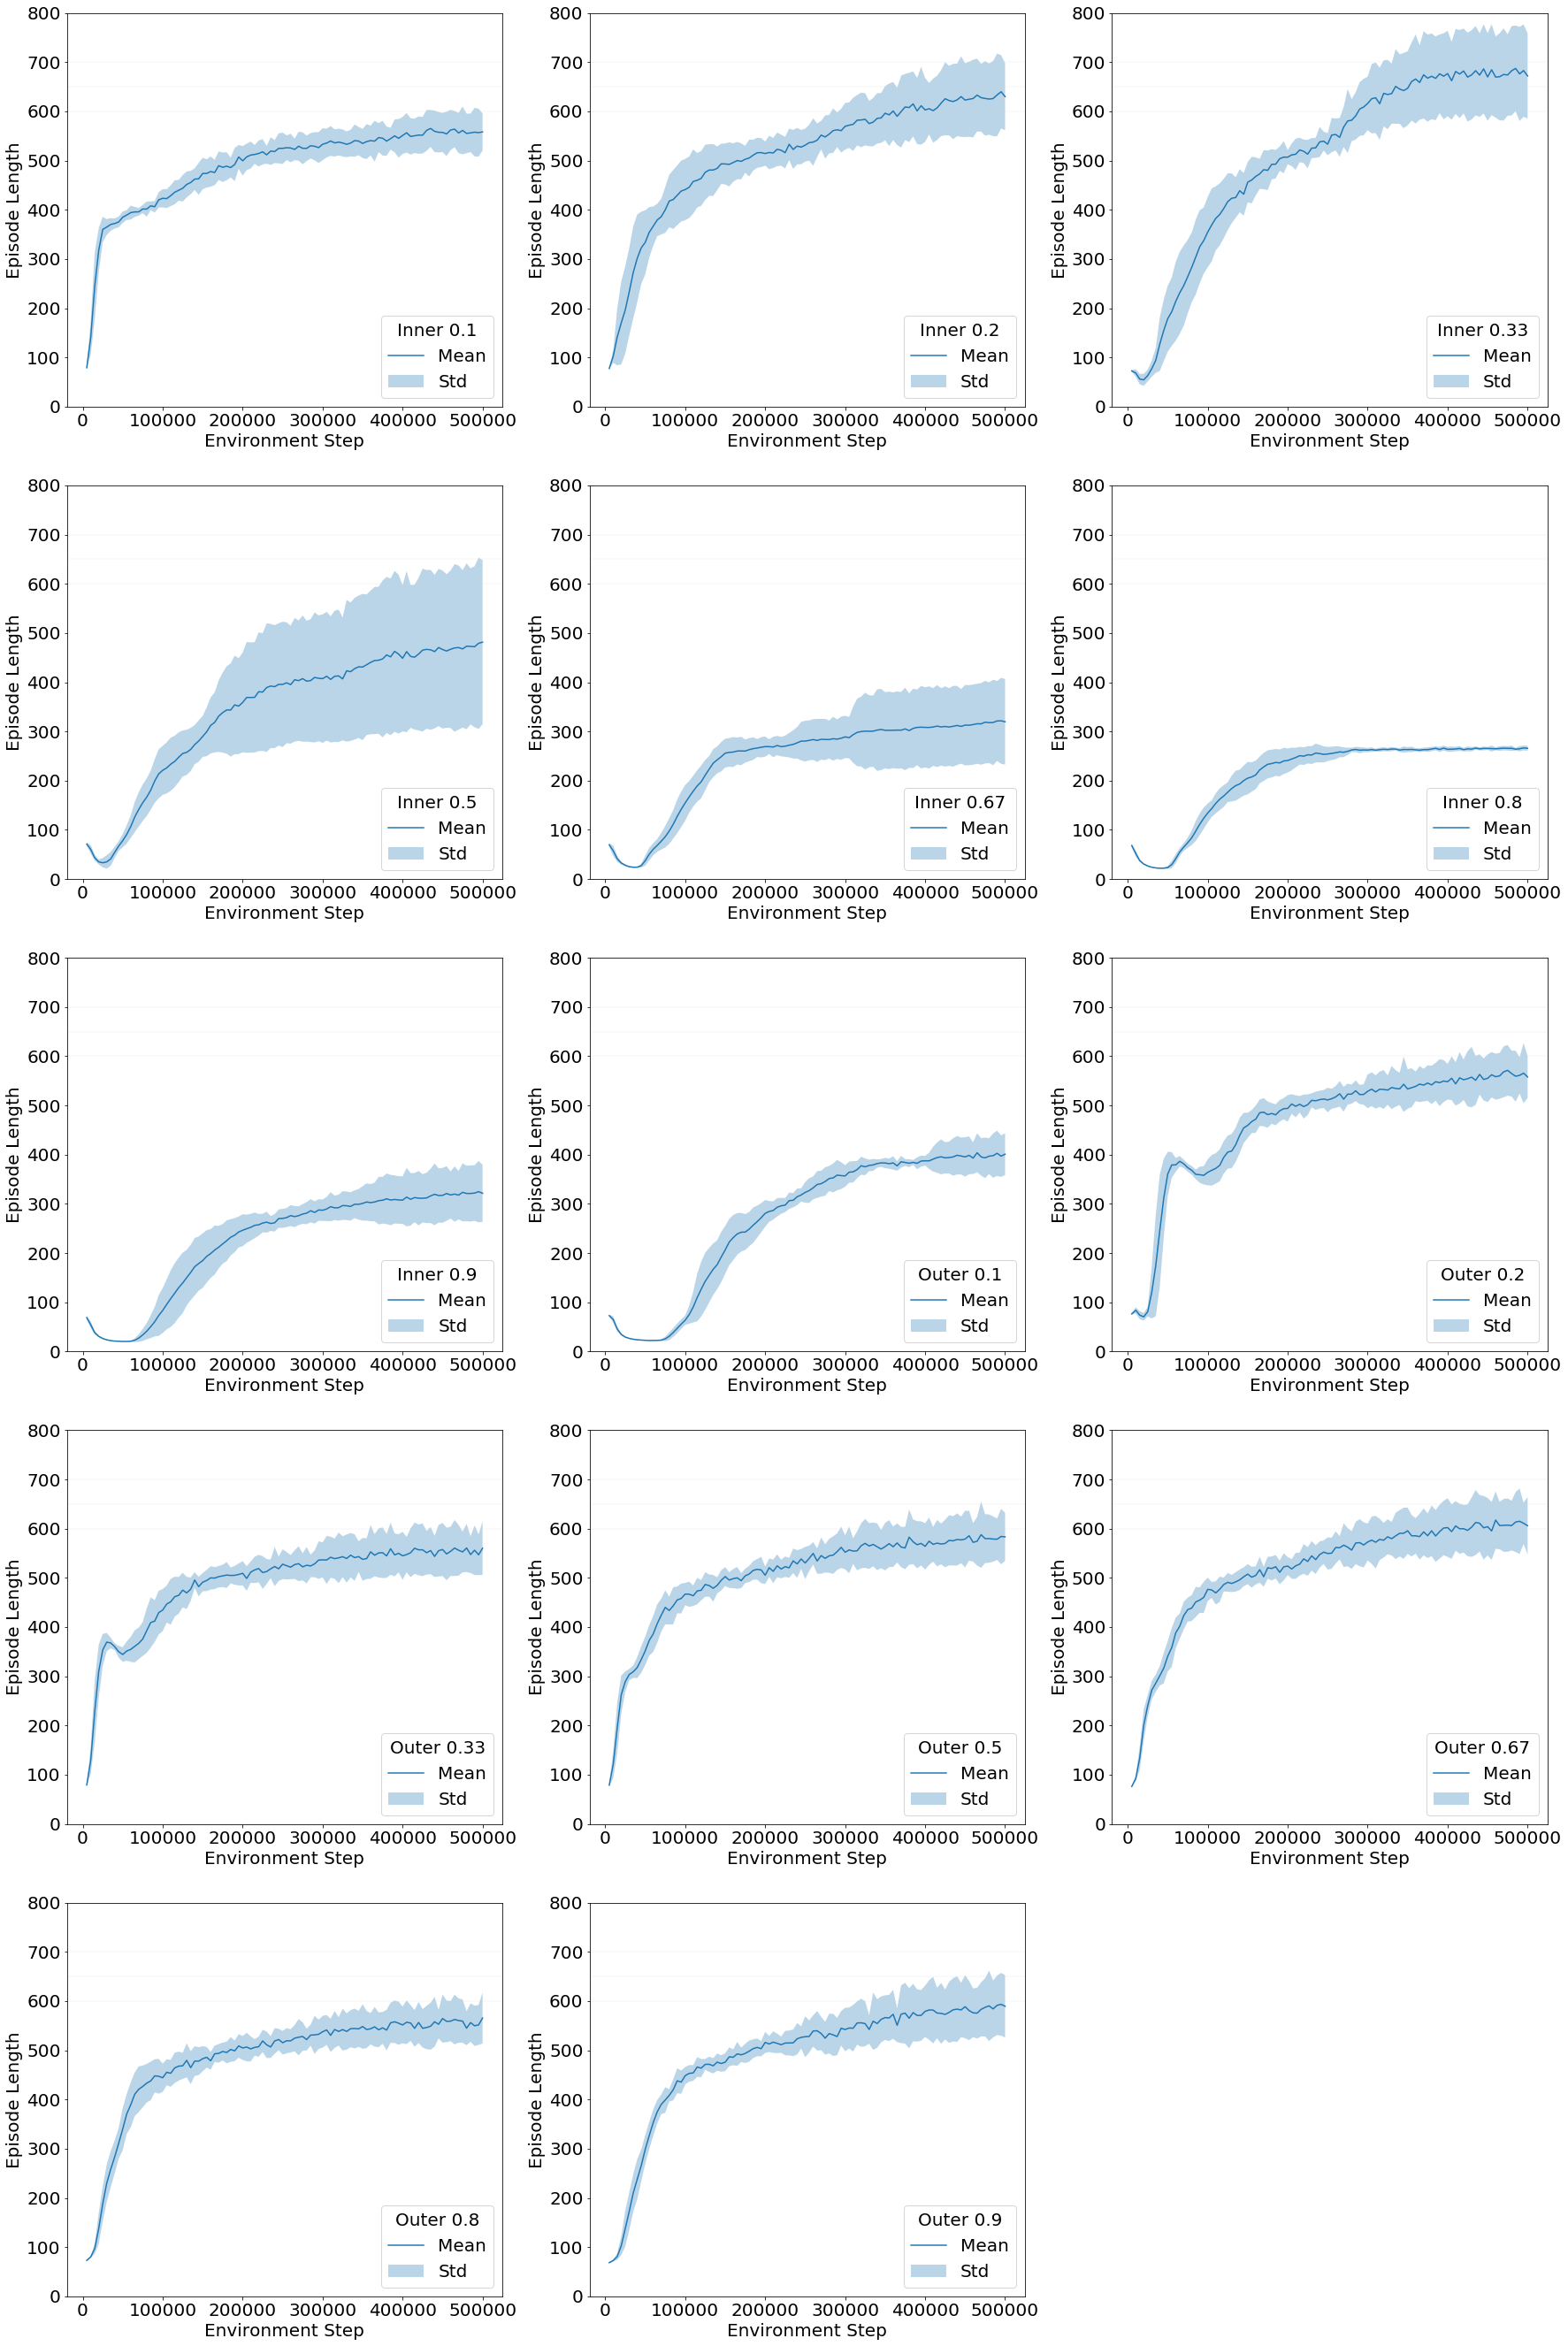

In [27]:
y_min = 0
y_max = 800

def singleThreshResult(steps, mean, std, title, y_min_lim, y_max_lim):
    plt.axhline(600, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.axhline(650, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.axhline(700, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.plot(steps, mean)
    plt.fill_between(steps[0], mean+std, mean-std, alpha=0.3)
    plt.ylim(y_min_lim, y_max_lim)
    plt.xlabel('Environment Step')
    plt.ylabel('Episode Length')
    plt.legend(['Mean', 'Std'], title=title, loc='lower right')

# Font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure()
plt.clf()

# INNER
plt.subplot(5, 3, 1)
singleThreshResult(bro_steps, bro_el_array[0]['mean'], bro_el_array[0]['std'], 'Inner 0.1', y_min, y_max)

plt.subplot(5, 3, 2)
singleThreshResult(bro_steps, bro_el_array[1]['mean'], bro_el_array[1]['std'], 'Inner 0.2', y_min, y_max)

plt.subplot(5, 3, 3)
singleThreshResult(bro_steps, bro_el_array[2]['mean'], bro_el_array[2]['std'], 'Inner 0.33', y_min, y_max)

plt.subplot(5, 3, 4)
singleThreshResult(bro_steps, bro_el_array[3]['mean'], bro_el_array[3]['std'], 'Inner 0.5', y_min, y_max)

plt.subplot(5, 3, 5)
singleThreshResult(bro_steps, bro_el_array[4]['mean'], bro_el_array[4]['std'], 'Inner 0.67', y_min, y_max)

plt.subplot(5, 3, 6)
singleThreshResult(bro_steps, bro_el_array[5]['mean'], bro_el_array[5]['std'], 'Inner 0.8', y_min, y_max)

plt.subplot(5, 3, 7)
singleThreshResult(bro_steps, bro_el_array[6]['mean'], bro_el_array[6]['std'], 'Inner 0.9', y_min, y_max)

# OUTER
plt.subplot(5, 3, 8)
singleThreshResult(bro_steps, bro_el_array[7]['mean'], bro_el_array[7]['std'], 'Outer 0.1', y_min, y_max)

plt.subplot(5, 3, 9)
singleThreshResult(bro_steps, bro_el_array[8]['mean'], bro_el_array[8]['std'], 'Outer 0.2', y_min, y_max)

plt.subplot(5, 3, 10)
singleThreshResult(bro_steps, bro_el_array[9]['mean'], bro_el_array[9]['std'], 'Outer 0.33', y_min, y_max)

plt.subplot(5, 3, 11)
singleThreshResult(bro_steps, bro_el_array[10]['mean'], bro_el_array[10]['std'], 'Outer 0.5', y_min, y_max)

plt.subplot(5, 3, 12)
singleThreshResult(bro_steps, bro_el_array[11]['mean'], bro_el_array[11]['std'], 'Outer 0.67', y_min, y_max)

plt.subplot(5, 3, 13)
singleThreshResult(bro_steps, bro_el_array[12]['mean'], bro_el_array[12]['std'], 'Outer 0.8', y_min, y_max)

plt.subplot(5, 3, 14)
singleThreshResult(bro_steps, bro_el_array[13]['mean'], bro_el_array[13]['std'], 'Outer 0.9', y_min, y_max)

#plt.tight_layout()
fig.set_size_inches(30, 47.5)
plt.show()

with PdfPages('./plots/bro_thresh_el_results.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')
    
# Reset font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

### Bucket

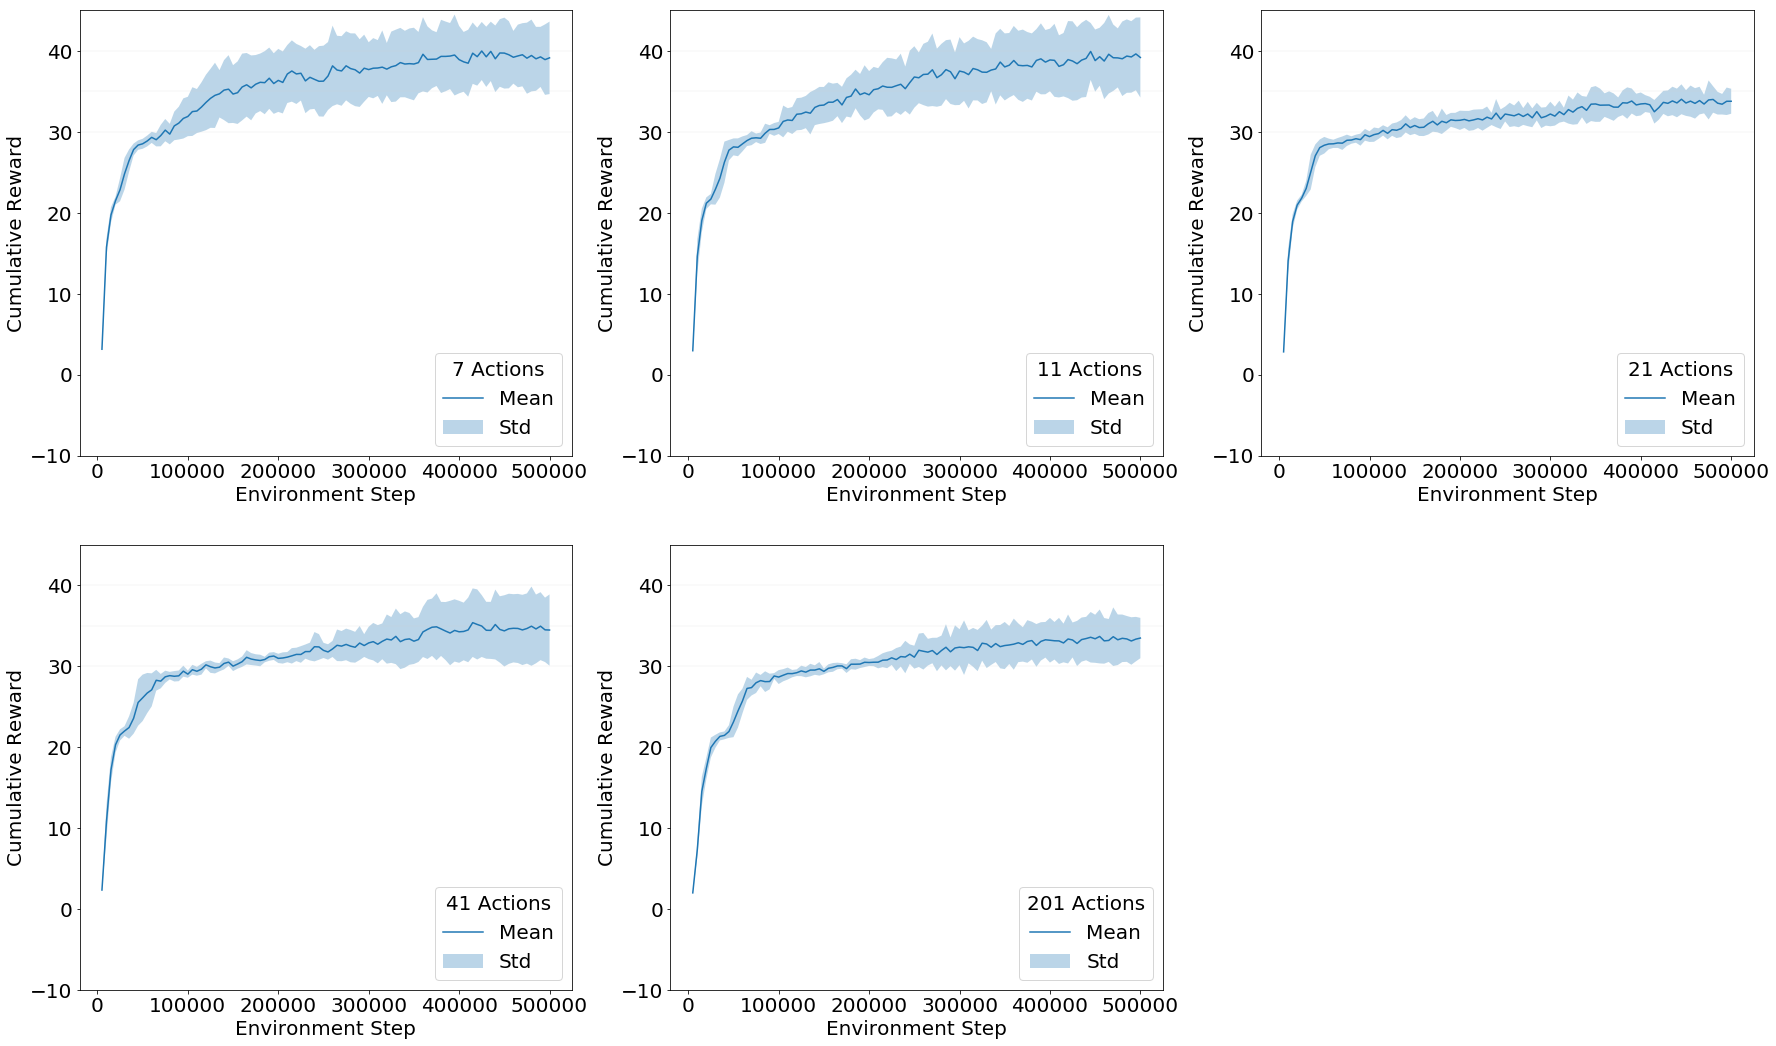

In [28]:
def singleBucketResult(steps, mean, std, title, y_min_lim, y_max_lim):
    plt.axhline(30, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.axhline(35, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.axhline(40, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.plot(steps, mean)
    plt.fill_between(steps[0], mean+std, mean-std, alpha=0.3)
    plt.ylim(y_min_lim, y_max_lim)
    plt.xlabel('Environment Step')
    plt.ylabel('Cumulative Reward')
    plt.legend(['Mean', 'Std'], title=title, loc='lower right')

# Font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure()
plt.clf()

plt.subplot(5, 3, 1)
singleBucketResult(bro_steps, bro_b_cum_array[0]['mean'], bro_b_cum_array[0]['std'], '7 Actions', -10, 45)

plt.subplot(5, 3, 2)
singleBucketResult(bro_steps, bro_b_cum_array[1]['mean'], bro_b_cum_array[1]['std'], '11 Actions', -10, 45)

plt.subplot(5, 3, 3)
singleBucketResult(bro_steps, bro_b_cum_array[2]['mean'], bro_b_cum_array[2]['std'], '21 Actions', -10, 45)

plt.subplot(5, 3, 4)
singleBucketResult(bro_steps, bro_b_cum_array[3]['mean'], bro_b_cum_array[3]['std'], '41 Actions', -10, 45)

plt.subplot(5, 3, 5)
singleBucketResult(bro_steps, bro_b_cum_array[4]['mean'], bro_b_cum_array[4]['std'], '201 Actions', -10, 45)

#plt.tight_layout()
fig.set_size_inches(30, 47.5)
plt.show()

with PdfPages('./plots/bro_buck_cum_results.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')
    
# Reset font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

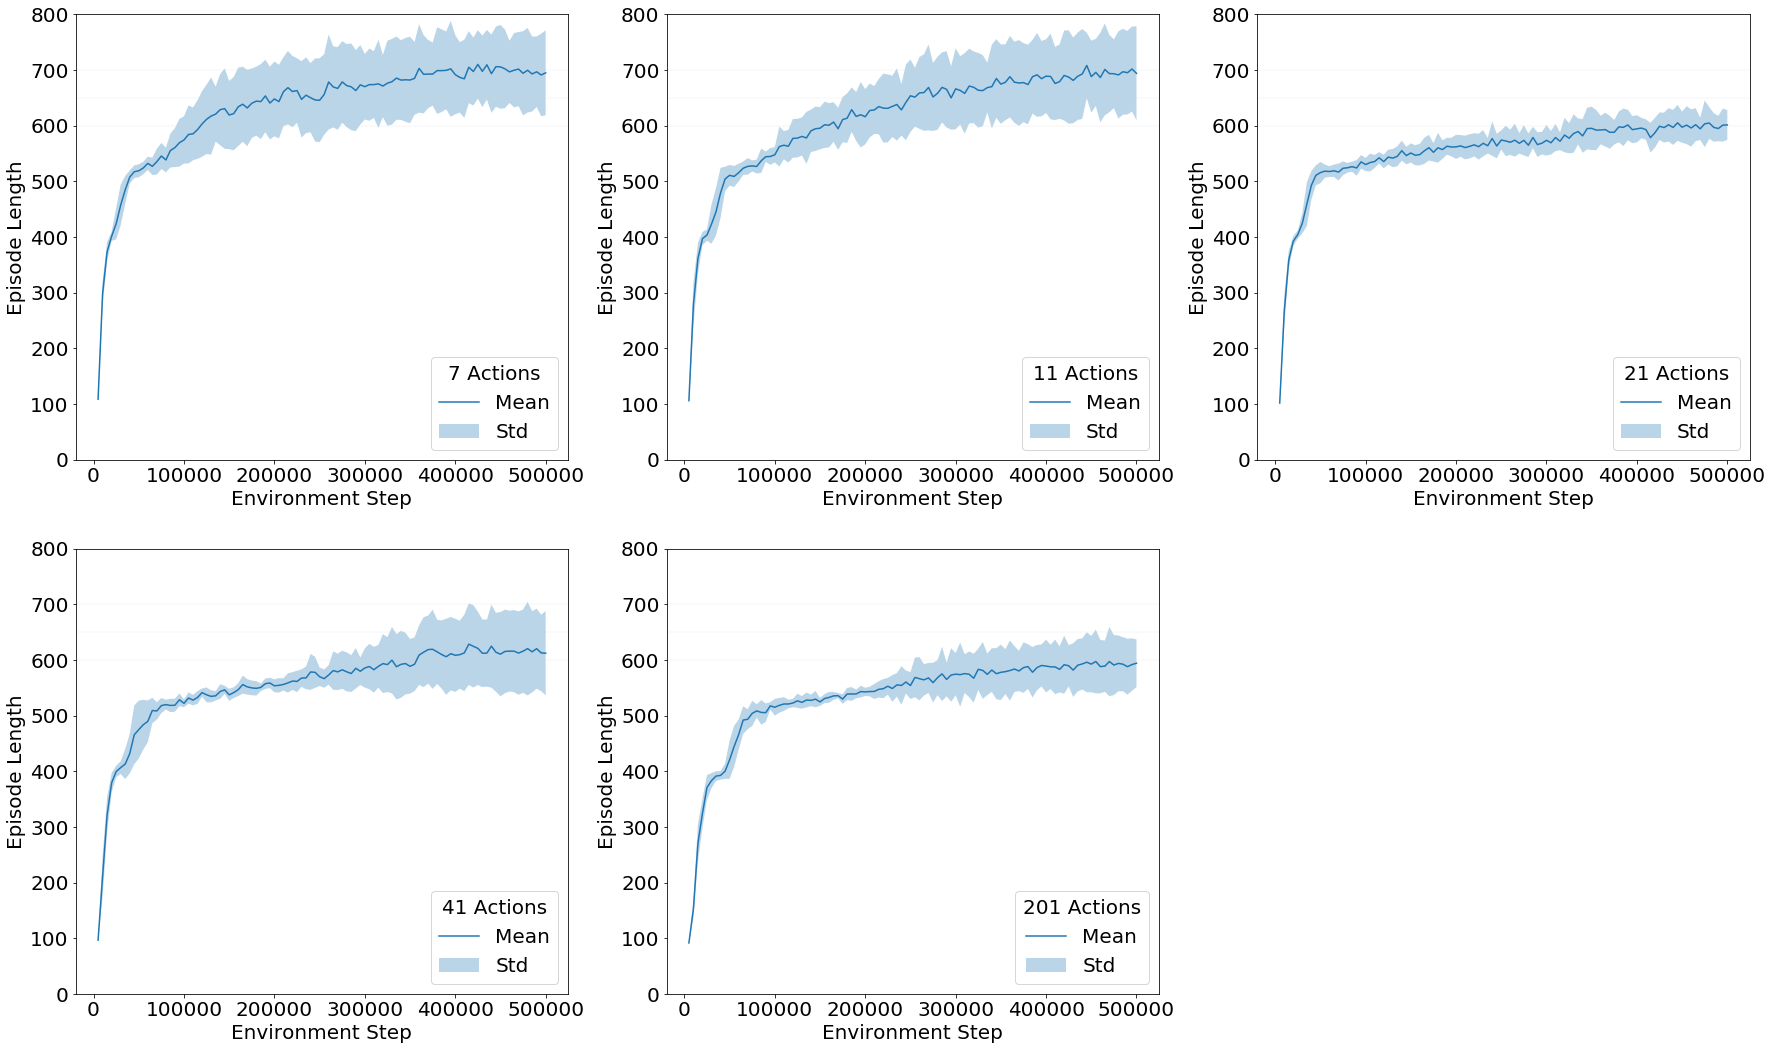

In [29]:
def singleBucketResult(steps, mean, std, title, y_min_lim, y_max_lim):
    plt.axhline(600, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.axhline(650, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.axhline(700, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.plot(steps, mean)
    plt.fill_between(steps[0], mean+std, mean-std, alpha=0.3)
    plt.ylim(y_min_lim, y_max_lim)
    plt.xlabel('Environment Step')
    plt.ylabel('Episode Length')
    plt.legend(['Mean', 'Std'], title=title, loc='lower right')

# Font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure()
plt.clf()

plt.subplot(5, 3, 1)
singleBucketResult(bro_steps, bro_b_el_array[0]['mean'], bro_b_el_array[0]['std'], '7 Actions', 0, 800)

plt.subplot(5, 3, 2)
singleBucketResult(bro_steps, bro_b_el_array[1]['mean'], bro_b_el_array[1]['std'], '11 Actions', 0, 800)

plt.subplot(5, 3, 3)
singleBucketResult(bro_steps, bro_b_el_array[2]['mean'], bro_b_el_array[2]['std'], '21 Actions', 0, 800)

plt.subplot(5, 3, 4)
singleBucketResult(bro_steps, bro_b_el_array[3]['mean'], bro_b_el_array[3]['std'], '41 Actions', 0, 800)

plt.subplot(5, 3, 5)
singleBucketResult(bro_steps, bro_b_el_array[4]['mean'], bro_b_el_array[4]['std'], '201 Actions', 0, 800)

#plt.tight_layout()
fig.set_size_inches(30, 47.5)
plt.show()

with PdfPages('./plots/bro_buck_el_results.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')
    
# Reset font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

### BRO Multiagent

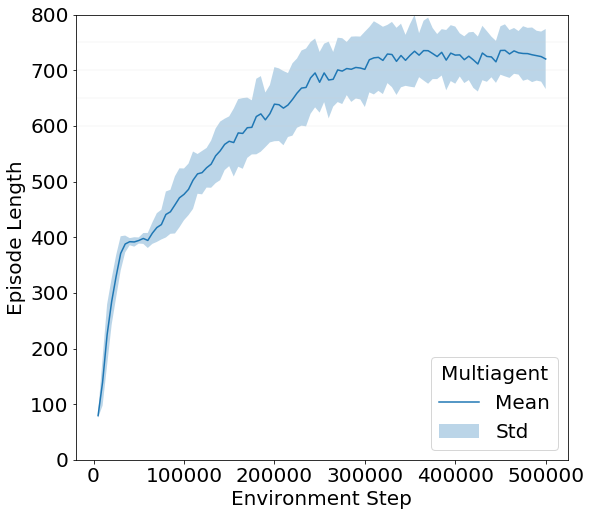

In [69]:
def singleMultResult(steps, mean, std, title, y_min_lim, y_max_lim):
    plt.axhline(600, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.axhline(650, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.axhline(700, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.axhline(750, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.plot(steps, mean)
    plt.fill_between(steps[0], mean+std, mean-std, alpha=0.3)
    plt.ylim(y_min_lim, y_max_lim)
    plt.xlabel('Environment Step')
    plt.ylabel('Episode Length')
    plt.legend(['Mean', 'Std'], title=title, loc='lower right')

# Font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure()
plt.clf()

plt.subplot(5, 3, 1)
singleMultResult(bro_steps, bro_m_el_array[0]['mean'], bro_m_el_array[0]['std'], 'Multiagent', 0, 800)

#plt.tight_layout()
fig.set_size_inches(30, 47.5)
plt.show()

with PdfPages('./plots/bro_mult_el_results.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')
    
# Reset font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

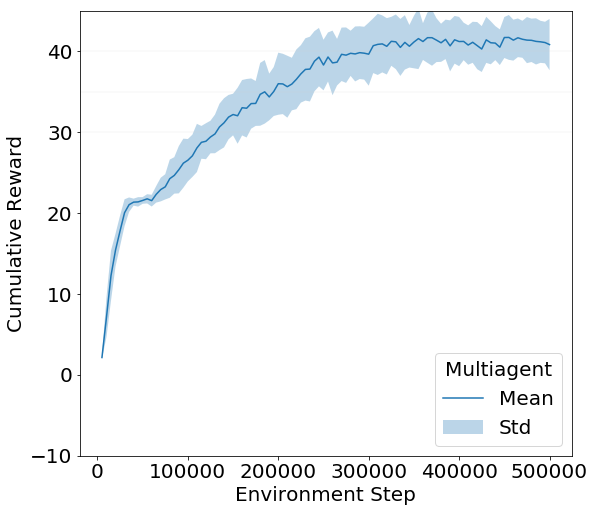

In [70]:
def singleBucketResult(steps, mean, std, title, y_min_lim, y_max_lim):
    plt.axhline(30, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.axhline(35, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.axhline(40, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.plot(steps, mean)
    plt.fill_between(steps[0], mean+std, mean-std, alpha=0.3)
    plt.ylim(y_min_lim, y_max_lim)
    plt.xlabel('Environment Step')
    plt.ylabel('Cumulative Reward')
    plt.legend(['Mean', 'Std'], title=title, loc='lower right')

# Font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure()
plt.clf()

plt.subplot(5, 3, 1)
singleBucketResult(bro_steps, bro_m_cum_array[0]['mean'], bro_m_cum_array[0]['std'], 'Multiagent', -10, 45)

#plt.tight_layout()
fig.set_size_inches(30, 47.5)
plt.show()

with PdfPages('./plots/bro_mult_cum_results.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')
    
# Reset font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

## SB Single Std Results for Annex

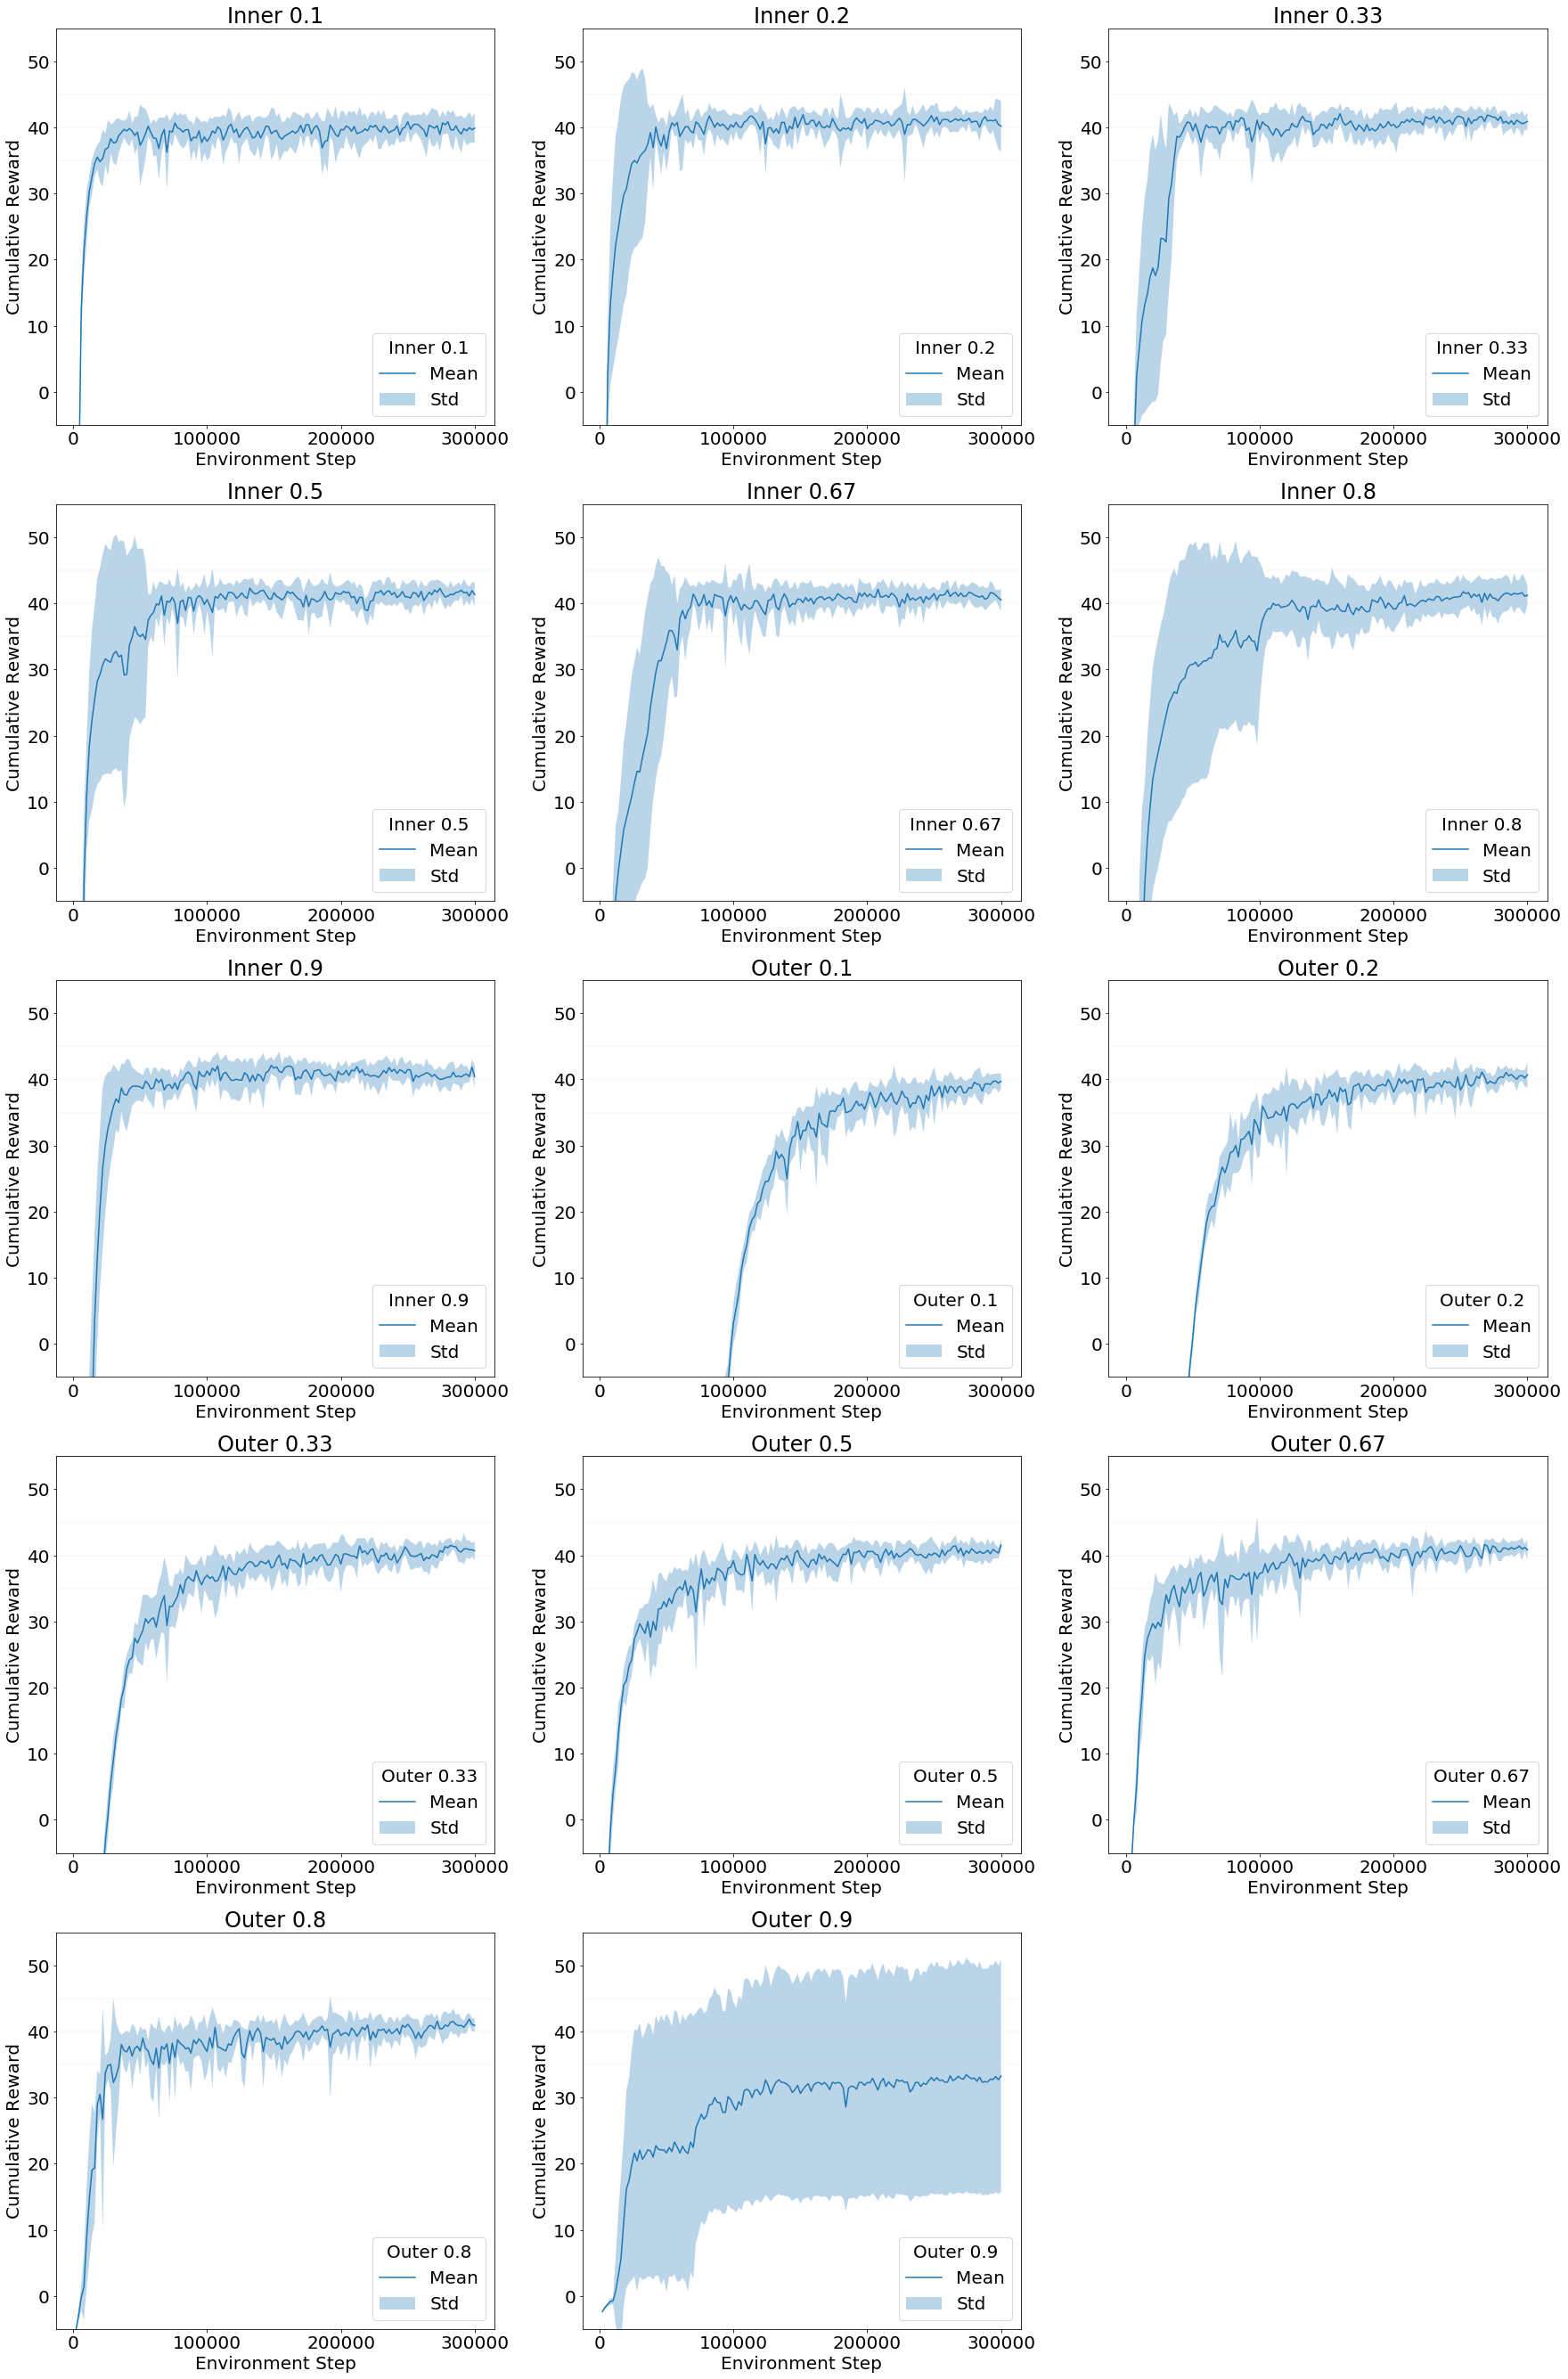

In [30]:
def singleThreshResult(steps, mean, std, title, y_min_lim, y_max_lim):
    plt.axhline(35, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.axhline(40, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.axhline(45, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.plot(steps, mean)
    plt.fill_between(steps, mean+std, mean-std, alpha=0.3)
    plt.ylim(y_min_lim, y_max_lim)
    plt.xlabel('Environment Step')
    plt.ylabel('Cumulative Reward')
    plt.legend(['Mean', 'Std'], title=title, loc='lower right')
    plt.xticks(np.arange(0, 300000+1, 100000))
    plt.title(title)

# Font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure()
plt.clf()

# INNER
plt.subplot(5, 3, 1)
singleThreshResult(sb_steps, sb_cum_array[0]['mean'], sb_cum_array[0]['std'], 'Inner 0.1', -5, 55)

plt.subplot(5, 3, 2)
singleThreshResult(sb_steps, sb_cum_array[1]['mean'], sb_cum_array[1]['std'], 'Inner 0.2', -5, 55)

plt.subplot(5, 3, 3)
singleThreshResult(sb_steps, sb_cum_array[2]['mean'], sb_cum_array[2]['std'], 'Inner 0.33', -5, 55)

plt.subplot(5, 3, 4)
singleThreshResult(sb_steps, sb_cum_array[3]['mean'], sb_cum_array[3]['std'], 'Inner 0.5', -5, 55)

plt.subplot(5, 3, 5)
singleThreshResult(sb_steps, sb_cum_array[4]['mean'], sb_cum_array[4]['std'], 'Inner 0.67', -5, 55)

plt.subplot(5, 3, 6)
singleThreshResult(sb_steps, sb_cum_array[5]['mean'], sb_cum_array[5]['std'], 'Inner 0.8', -5, 55)

plt.subplot(5, 3, 7)
singleThreshResult(sb_steps, sb_cum_array[6]['mean'], sb_cum_array[6]['std'], 'Inner 0.9', -5, 55)

# OUTER
plt.subplot(5, 3, 8)
singleThreshResult(sb_steps, sb_cum_array[7]['mean'], sb_cum_array[7]['std'], 'Outer 0.1', -5, 55)

plt.subplot(5, 3, 9)
singleThreshResult(sb_steps, sb_cum_array[8]['mean'], sb_cum_array[8]['std'], 'Outer 0.2', -5, 55)

plt.subplot(5, 3, 10)
singleThreshResult(sb_steps, sb_cum_array[9]['mean'], sb_cum_array[9]['std'], 'Outer 0.33', -5, 55)

plt.subplot(5, 3, 11)
singleThreshResult(sb_steps, sb_cum_array[10]['mean'], sb_cum_array[10]['std'], 'Outer 0.5', -5, 55)

plt.subplot(5, 3, 12)
singleThreshResult(sb_steps, sb_cum_array[11]['mean'], sb_cum_array[11]['std'], 'Outer 0.67', -5, 55)

plt.subplot(5, 3, 13)
singleThreshResult(sb_steps, sb_cum_array[12]['mean'], sb_cum_array[12]['std'], 'Outer 0.8', -5, 55)

plt.subplot(5, 3, 14)
singleThreshResult(sb_steps, sb_cum_array[13]['mean'], sb_cum_array[13]['std'], 'Outer 0.9', -5, 55)

fig.set_size_inches(30, 47.5)
plt.show()

with PdfPages('./plots/sb_thresh_cum_results.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')
    
# Reset font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

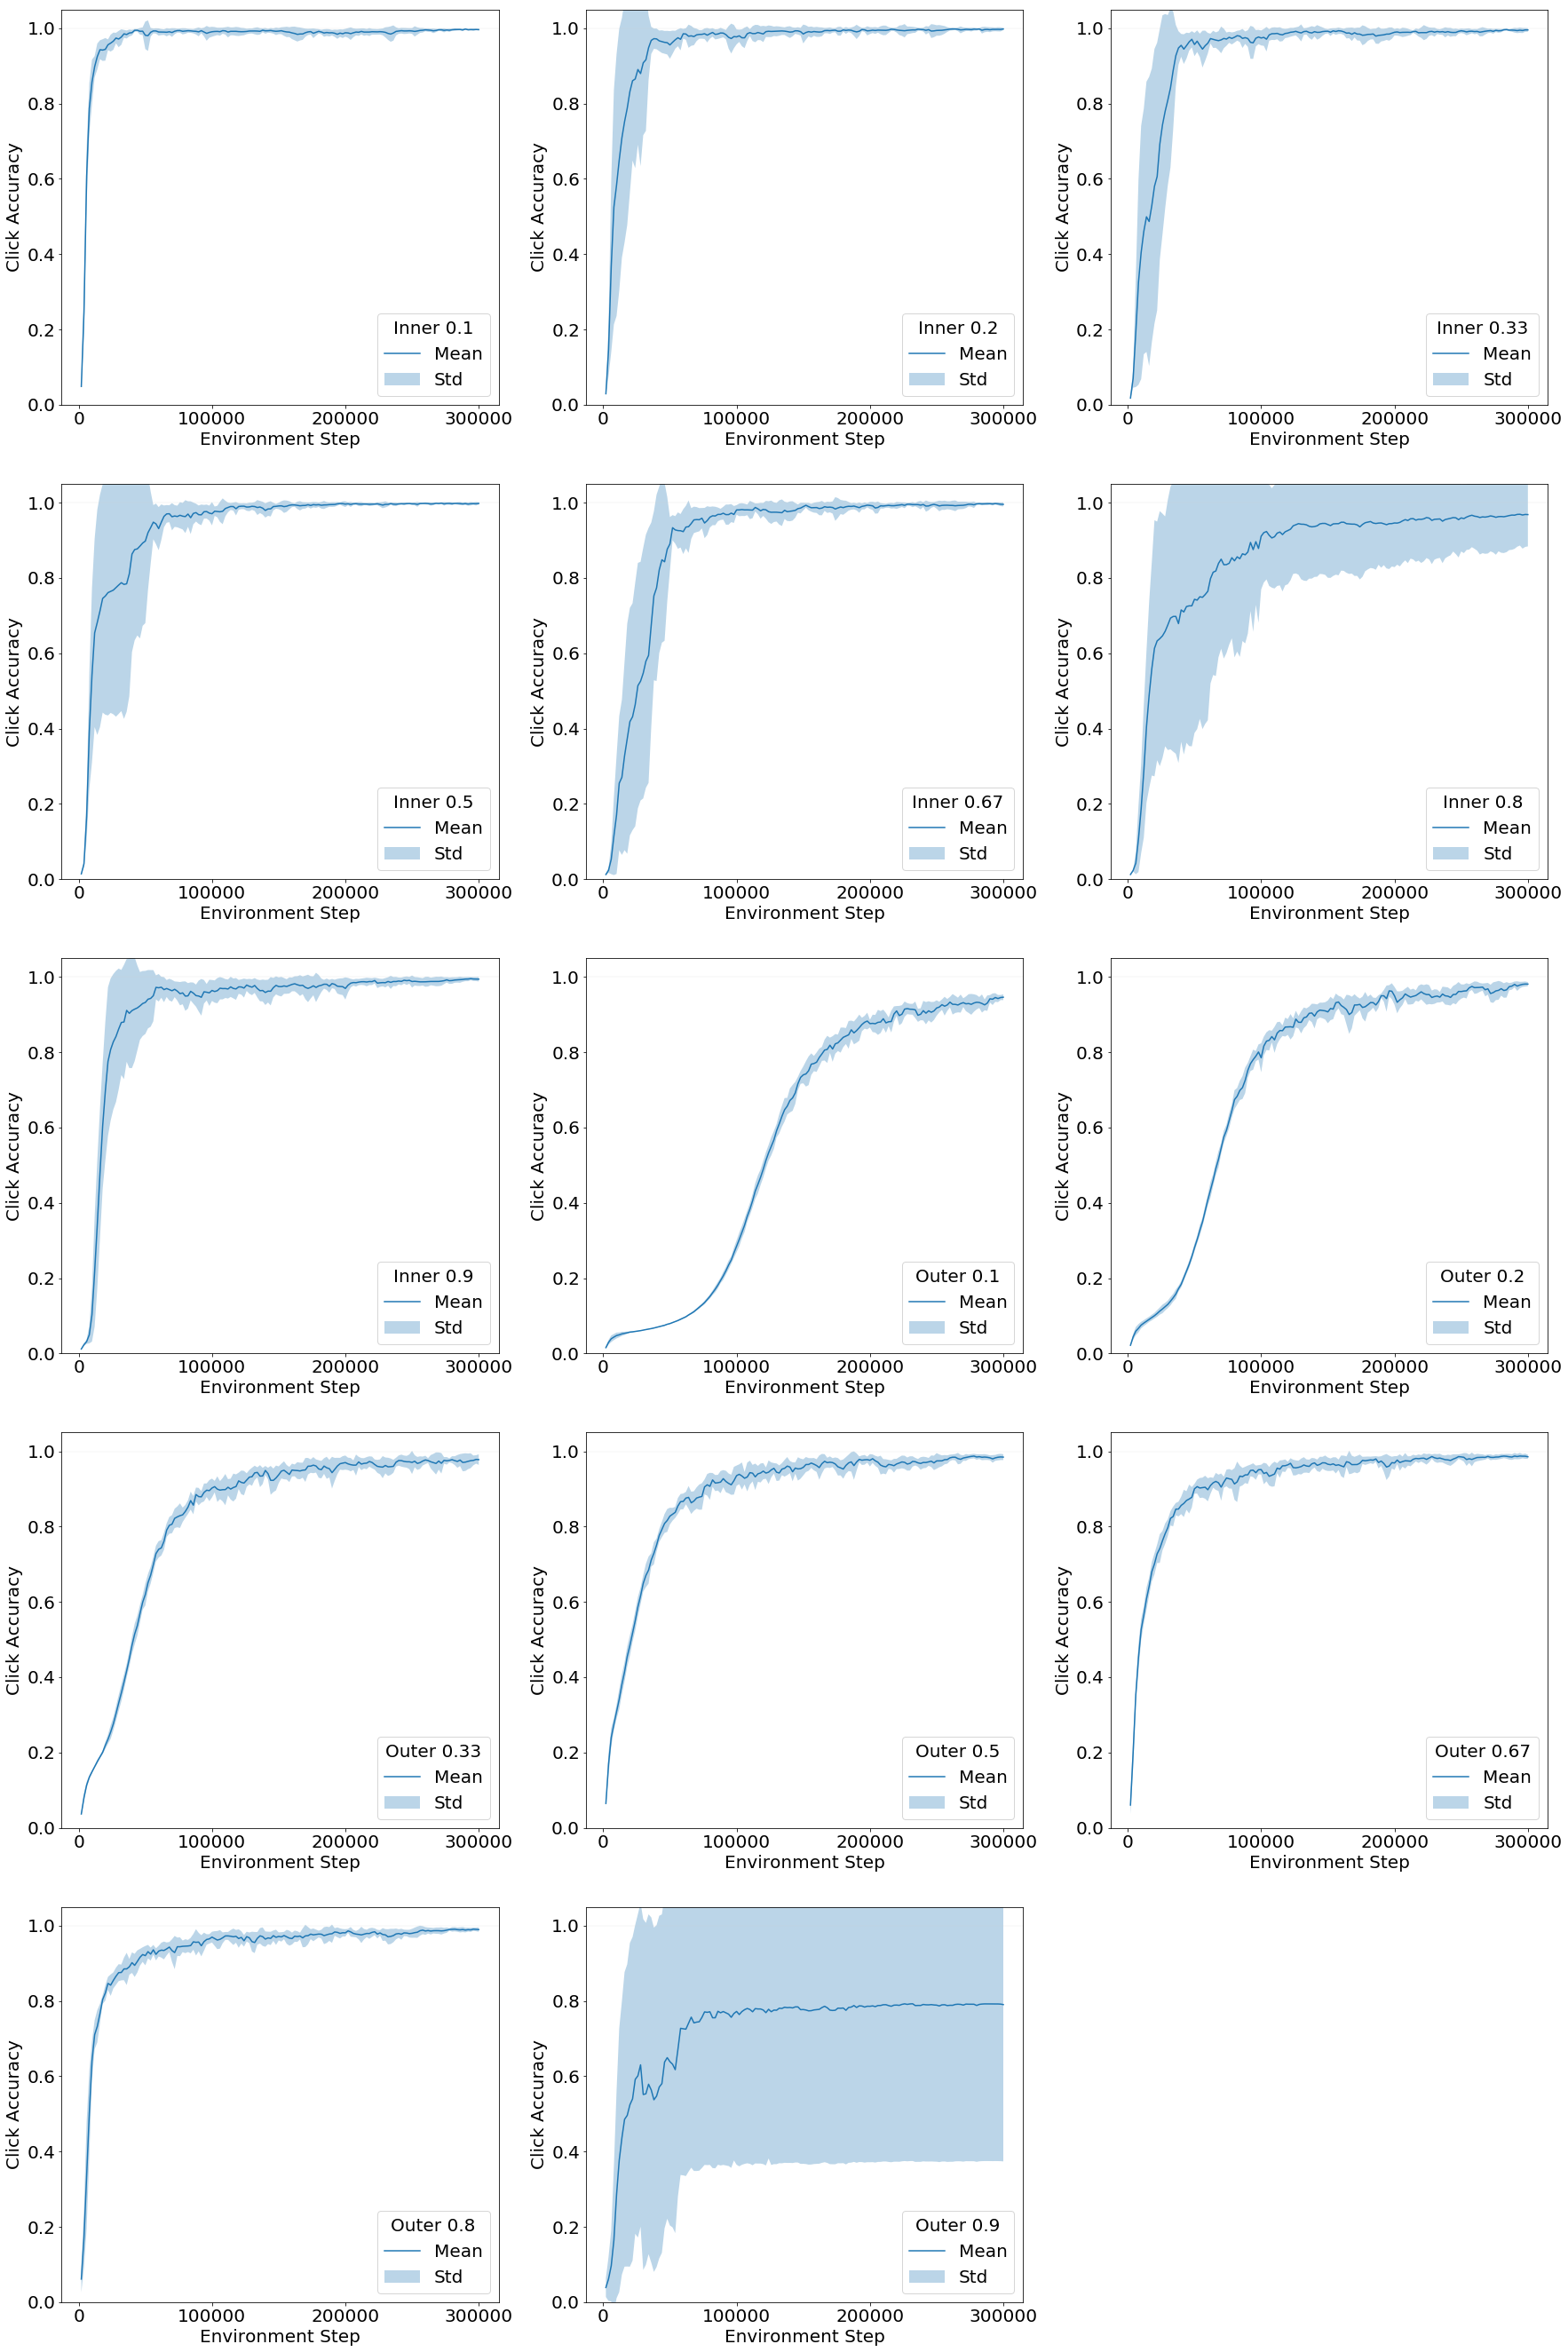

In [31]:
def singleThreshResult(steps, mean, std, title, y_min_lim, y_max_lim):
    plt.axhline(1, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.plot(steps, mean)
    plt.fill_between(steps, mean+std, mean-std, alpha=0.3)
    plt.ylim(y_min_lim, y_max_lim)
    plt.xlabel('Environment Step')
    plt.ylabel('Click Accuracy')
    plt.legend(['Mean', 'Std'], title=title, loc='lower right')
    plt.xticks(np.arange(0, 300000+1, 100000))

# Font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure()
plt.clf()

# INNER
plt.subplot(5, 3, 1)
singleThreshResult(sb_steps, sb_acc_array[0]['mean'], sb_acc_array[0]['std'], 'Inner 0.1', 0, 1.05)

plt.subplot(5, 3, 2)
singleThreshResult(sb_steps, sb_acc_array[1]['mean'], sb_acc_array[1]['std'], 'Inner 0.2', 0, 1.05)

plt.subplot(5, 3, 3)
singleThreshResult(sb_steps, sb_acc_array[2]['mean'], sb_acc_array[2]['std'], 'Inner 0.33', 0, 1.05)

plt.subplot(5, 3, 4)
singleThreshResult(sb_steps, sb_acc_array[3]['mean'], sb_acc_array[3]['std'], 'Inner 0.5', 0, 1.05)

plt.subplot(5, 3, 5)
singleThreshResult(sb_steps, sb_acc_array[4]['mean'], sb_acc_array[4]['std'], 'Inner 0.67', 0, 1.05)

plt.subplot(5, 3, 6)
singleThreshResult(sb_steps, sb_acc_array[5]['mean'], sb_acc_array[5]['std'], 'Inner 0.8', 0, 1.05)

plt.subplot(5, 3, 7)
singleThreshResult(sb_steps, sb_acc_array[6]['mean'], sb_acc_array[6]['std'], 'Inner 0.9', 0, 1.05)

# OUTER
plt.subplot(5, 3, 8)
singleThreshResult(sb_steps, sb_acc_array[7]['mean'], sb_acc_array[7]['std'], 'Outer 0.1', 0, 1.05)

plt.subplot(5, 3, 9)
singleThreshResult(sb_steps, sb_acc_array[8]['mean'], sb_acc_array[8]['std'], 'Outer 0.2', 0, 1.05)

plt.subplot(5, 3, 10)
singleThreshResult(sb_steps, sb_acc_array[9]['mean'], sb_acc_array[9]['std'], 'Outer 0.33', 0, 1.05)

plt.subplot(5, 3, 11)
singleThreshResult(sb_steps, sb_acc_array[10]['mean'], sb_acc_array[10]['std'], 'Outer 0.5', 0, 1.05)

plt.subplot(5, 3, 12)
singleThreshResult(sb_steps, sb_acc_array[11]['mean'], sb_acc_array[11]['std'], 'Outer 0.67', 0, 1.05)

plt.subplot(5, 3, 13)
singleThreshResult(sb_steps, sb_acc_array[12]['mean'], sb_acc_array[12]['std'], 'Outer 0.8', 0, 1.05)

plt.subplot(5, 3, 14)
singleThreshResult(sb_steps, sb_acc_array[13]['mean'], sb_acc_array[13]['std'], 'Outer 0.9', 0, 1.05)

fig.set_size_inches(30, 47.5)
plt.show()

with PdfPages('./plots/sb_thresh_acc_results.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')
    
# Reset font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

### Bucket

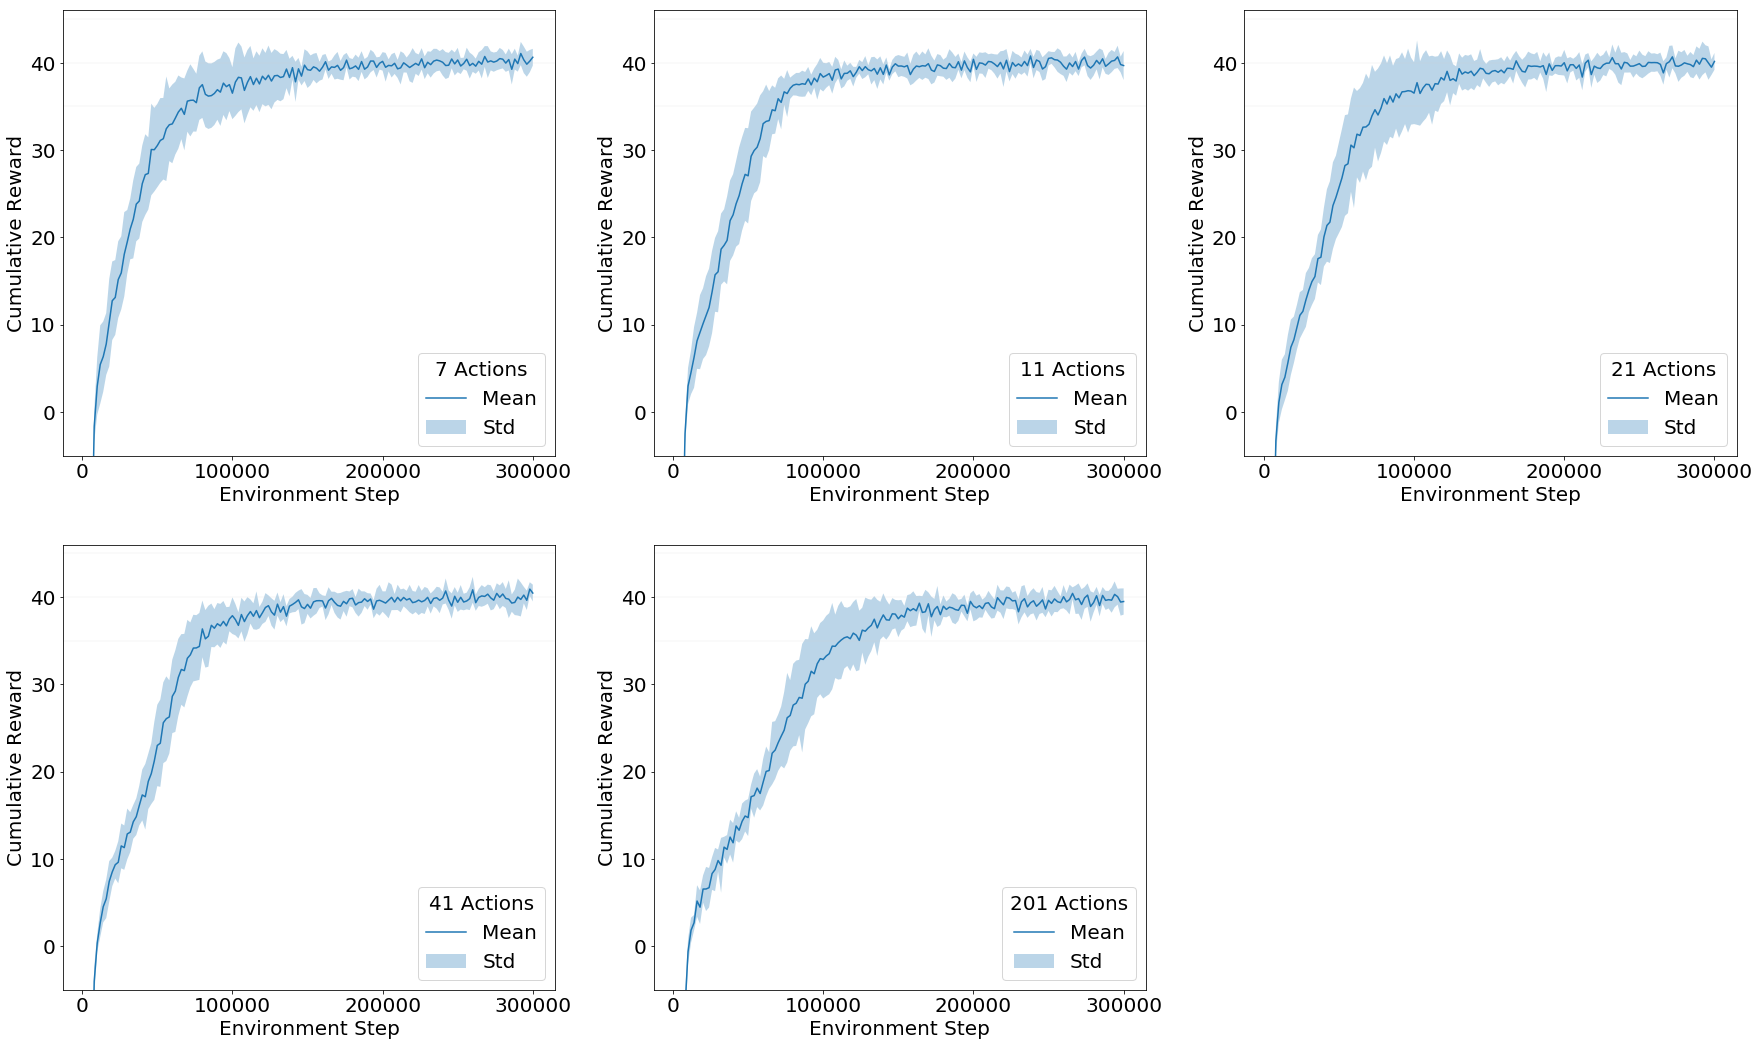

In [32]:
def singleBucketResult(steps, mean, std, title, y_min_lim, y_max_lim):
    plt.axhline(35, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.axhline(40, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.axhline(45, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.plot(steps, mean)
    plt.fill_between(steps, mean+std, mean-std, alpha=0.3)
    plt.ylim(y_min_lim, y_max_lim)
    plt.xlabel('Environment Step')
    plt.ylabel('Cumulative Reward')
    plt.legend(['Mean', 'Std'], title=title, loc='lower right')
    plt.xticks(np.arange(0, 300000+1, 100000))

# Font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure()
plt.clf()

plt.subplot(5, 3, 1)
singleBucketResult(sb_steps, sb_b_cum_array[0]['mean'], sb_b_cum_array[0]['std'], '7 Actions', -5, 46)

plt.subplot(5, 3, 2)
singleBucketResult(sb_steps, sb_b_cum_array[1]['mean'], sb_b_cum_array[1]['std'], '11 Actions', -5, 46)

plt.subplot(5, 3, 3)
singleBucketResult(sb_steps, sb_b_cum_array[2]['mean'], sb_b_cum_array[2]['std'], '21 Actions', -5, 46)

plt.subplot(5, 3, 4)
singleBucketResult(sb_steps, sb_b_cum_array[3]['mean'], sb_b_cum_array[3]['std'], '41 Actions', -5, 46)

plt.subplot(5, 3, 5)
singleBucketResult(sb_steps, sb_b_cum_array[4]['mean'], sb_b_cum_array[4]['std'], '201 Actions', -5, 46)

fig.set_size_inches(30, 47.5)
plt.show()

with PdfPages('./plots/sb_buck_cum_results.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')
    
# Reset font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

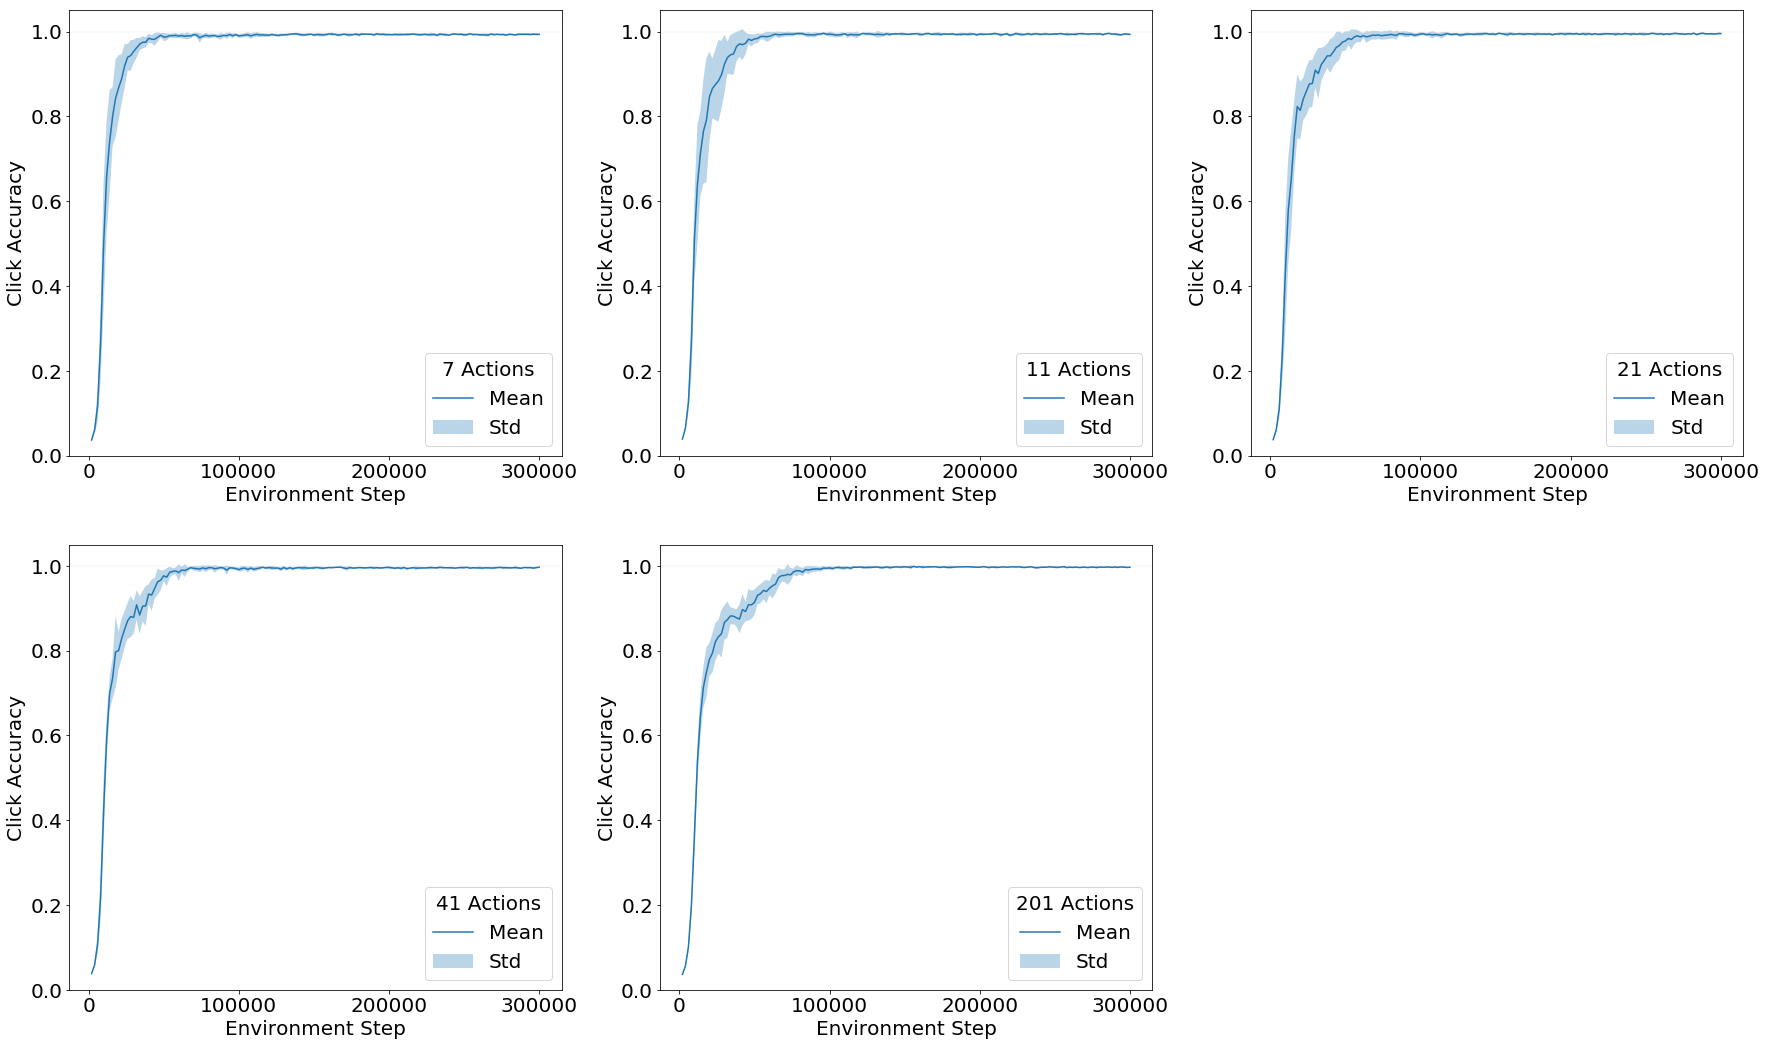

In [33]:
def singleBucketResult(steps, mean, std, title, y_min_lim, y_max_lim):
    plt.axhline(1, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.plot(steps, mean)
    plt.fill_between(steps, mean+std, mean-std, alpha=0.3)
    plt.ylim(y_min_lim, y_max_lim)
    plt.xlabel('Environment Step')
    plt.ylabel('Click Accuracy')
    plt.legend(['Mean', 'Std'], title=title, loc='lower right')
    plt.xticks(np.arange(0, 300000+1, 100000))

# Font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure()
plt.clf()

plt.subplot(5, 3, 1)
singleBucketResult(sb_steps, sb_b_acc_array[0]['mean'], sb_b_acc_array[0]['std'], '7 Actions', 0, 1.05)

plt.subplot(5, 3, 2)
singleBucketResult(sb_steps, sb_b_acc_array[1]['mean'], sb_b_acc_array[1]['std'], '11 Actions', 0, 1.05)

plt.subplot(5, 3, 3)
singleBucketResult(sb_steps, sb_b_acc_array[2]['mean'], sb_b_acc_array[2]['std'], '21 Actions', 0, 1.05)

plt.subplot(5, 3, 4)
singleBucketResult(sb_steps, sb_b_acc_array[3]['mean'], sb_b_acc_array[3]['std'], '41 Actions', 0, 1.05)

plt.subplot(5, 3, 5)
singleBucketResult(sb_steps, sb_b_acc_array[4]['mean'], sb_b_acc_array[4]['std'], '201 Actions', 0, 1.05)

fig.set_size_inches(30, 47.5)
plt.show()

with PdfPages('./plots/sb_buck_acc_results.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')
    
# Reset font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

### Multiagent

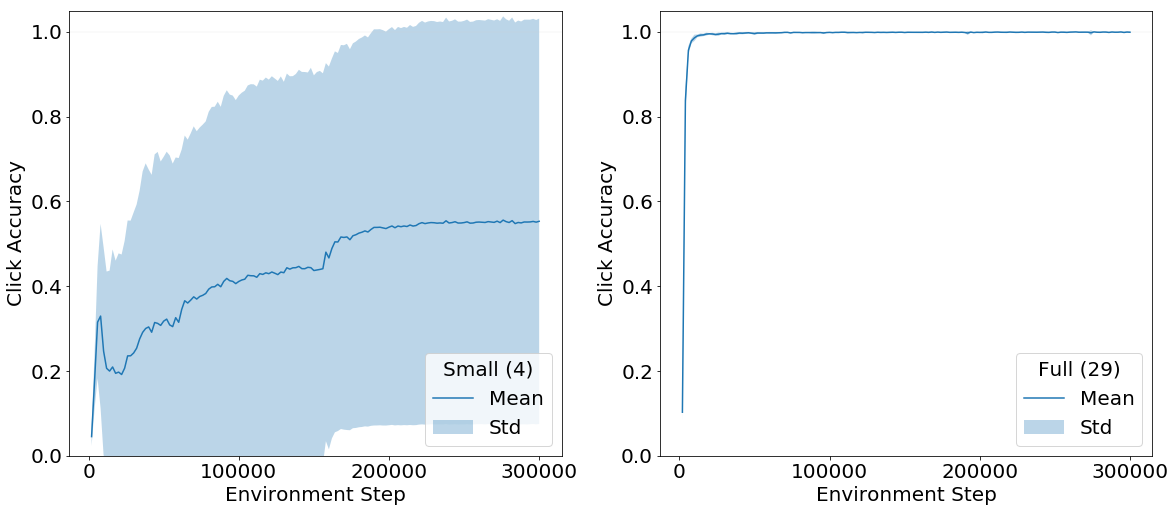

In [64]:
def singleMultResult(steps, mean, std, title, y_min_lim, y_max_lim):
    plt.axhline(1, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.plot(steps, mean)
    plt.fill_between(steps, mean+std, mean-std, alpha=0.3)
    plt.ylim(y_min_lim, y_max_lim)
    plt.xlabel('Environment Step')
    plt.ylabel('Click Accuracy')
    plt.legend(['Mean', 'Std'], title=title, loc='lower right')
    plt.xticks(np.arange(0, 300000+1, 100000))


# Font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure()
plt.clf()

plt.subplot(5, 3, 1)
singleMultResult(sb_steps, sb_m_acc_array[0]['mean'], sb_m_acc_array[0]['std'], 'Small (4)', 0, 1.05)

plt.subplot(5, 3, 2)
singleMultResult(sb_steps, sb_m_acc_array[1]['mean'], sb_m_acc_array[1]['std'], 'Full (29)', 0, 1.05)

#plt.tight_layout()
fig.set_size_inches(30, 47.5)
plt.show()

with PdfPages('./plots/sb_mul_acc_results.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')
    
# Reset font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

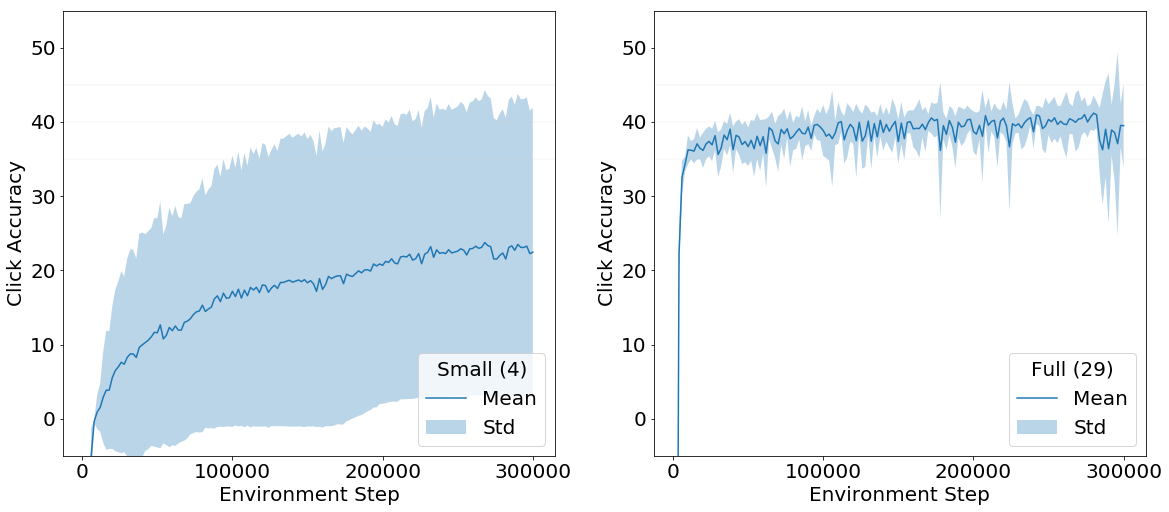

In [65]:
def singleMultResult(steps, mean, std, title, y_min_lim, y_max_lim):
    plt.axhline(35, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.axhline(40, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.axhline(45, color='lightgrey', linewidth = 0.2, label='_nolegend_')
    plt.plot(steps, mean)
    plt.fill_between(steps, mean+std, mean-std, alpha=0.3)
    plt.ylim(y_min_lim, y_max_lim)
    plt.xlabel('Environment Step')
    plt.ylabel('Click Accuracy')
    plt.legend(['Mean', 'Std'], title=title, loc='lower right')
    plt.xticks(np.arange(0, 300000+1, 100000))


# Font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure()
plt.clf()

plt.subplot(5, 3, 1)
singleMultResult(sb_steps, sb_m_cum_array[0]['mean'], sb_m_cum_array[0]['std'], 'Small (4)', -5, 55)

plt.subplot(5, 3, 2)
singleMultResult(sb_steps, sb_m_cum_array[1]['mean'], sb_m_cum_array[1]['std'], 'Full (29)', -5, 55)

#plt.tight_layout()
fig.set_size_inches(30, 47.5)
plt.show()

with PdfPages('./plots/sb_mul_cum_results.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')
    
# Reset font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)